### Начальные импорты

In [15]:
import sys
import os

# Путь к корню проекта (на один уровень выше папки train_model)
project_root = os.path.abspath(os.path.join('..')) 
sys.path.append(project_root)

import pandas as pd

from db.database import sync_session_factory
from db.queries.core import SyncCore as SC

### Формирование набора данных из таблиц базы данных

In [3]:
def get_data_from_tables(table_names: list[str]) -> dict[str, pd.DataFrame]:
    res = {}
    for table_name in table_names:
        query = f"select * from {table_name}"
        with sync_session_factory() as session:
            df = pd.read_sql(query, session.connection())
        res[table_name] = df
    return res

In [ ]:
TABLE_NAMES = SC.get_table_names() # Получаем название всех таблиц базы данных

In [ ]:
dict_df = get_data_from_tables(TABLE_NAMES) # Формируем набор данных из таблиц базы данных

#### Рассмотрение полученных наборов данных, учавствующих в моделировании матчей

In [9]:
dict_df['game'].info()
dict_df['game'].head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   game_id         2160 non-null   int64         
 1   season_game_id  2160 non-null   object        
 2   season_id       2160 non-null   object        
 3   left_team_id    2160 non-null   object        
 4   right_team_id   2160 non-null   object        
 5   game_status_id  2160 non-null   int64         
 6   tour_number     2160 non-null   int64         
 7   start_date      2160 non-null   object        
 8   start_time      2160 non-null   object        
 9   min             0 non-null      object        
 10  plus_min        0 non-null      object        
 11  created_at      2160 non-null   datetime64[ns]
 12  updated_at      2160 non-null   datetime64[ns]
 13  left_coach_id   2144 non-null   object        
 14  right_coach_id  2146 non-null   object        
dtypes: d

game_id season_game_id season_id left_team_id   right_team_id  \
0     8927         567360      1768   5-fk-zenit  3-fk-lokomotiv   

   game_status_id  tour_number  start_date start_time   min plus_min  \
0               1            1  2016-07-30   17:30:00  None     None   

                  created_at                 updated_at left_coach_id  \
0 2025-05-06 02:08:53.898019 2025-05-06 02:08:53.898019           158   

  right_coach_id  
0           7276

In [8]:
dict_df['referee_game'].info()
dict_df['referee_game'].head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   referee_id  2131 non-null   object
 1   game_id     2131 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.4+ KB


referee_id  game_id
0        416     8927

In [10]:
dict_df['goal'].info()
dict_df['goal'].head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   goal_id        5376 non-null   int64         
 1   game_id        5376 non-null   int64         
 2   team_id        5376 non-null   object        
 3   player_id      5376 non-null   object        
 4   player_sub_id  3387 non-null   object        
 5   goal_type_id   5376 non-null   int64         
 6   min            5376 non-null   int64         
 7   plus_min       498 non-null    float64       
 8   created_at     5376 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 378.1+ KB


goal_id  game_id      team_id player_id player_sub_id  goal_type_id  min  \
0    24211     8929  6-fk-rostov     64182          6804            27   83   

   plus_min                 created_at  
0       NaN 2025-05-06 02:08:54.608279

In [11]:
dict_df['goal_type'].info()
dict_df['goal_type'].head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   goal_type_id  3 non-null      int64 
 1   name          3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


goal_type_id name
0            27  гол

In [ ]:
dict_df['lineup'].info()
dict_df['lineup'].head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61907 entries, 0 to 61906
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   game_id       61907 non-null  int64         
 1   team_id       61907 non-null  object        
 2   player_id     61907 non-null  object        
 3   min_in        15073 non-null  float64       
 4   plus_min_in   714 non-null    float64       
 5   min_out       15071 non-null  float64       
 6   plus_min_out  714 non-null    float64       
 7   created_at    61907 non-null  datetime64[ns]
 8   updated_at    61907 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 4.3+ MB


game_id      team_id player_id  min_in  plus_min_in  min_out  \
61906    11061  6-fk-rostov    475399    84.0          NaN      NaN   

       plus_min_out                 created_at                 updated_at  
61906           NaN 2025-05-06 02:26:38.436176 2025-05-06 02:26:38.436176

In [13]:
dict_df['penalty'].info()
dict_df['penalty'].head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   game_id          9995 non-null   int64         
 1   team_id          9995 non-null   object        
 2   player_id        9995 non-null   object        
 3   penalty_type_id  9995 non-null   int64         
 4   min              9995 non-null   int64         
 5   plus_min         1345 non-null   float64       
 6   created_at       9995 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 546.7+ KB


game_id     team_id player_id  penalty_type_id  min  plus_min  \
0     8927  5-fk-zenit     60990               27   80       NaN   

                  created_at  
0 2025-05-06 02:08:53.920391

### Молелирование матчей

#### Функции моделирования матчей

In [ ]:
def add_time_event(time_events: set, 
                   min_column_name: str, 
                   plus_min_column_name: str, 
                   df: pd.DataFrame):
    """Добавляет во временное множество событий время события

    Args:
        time_events (set): Временное множество событий
        min_column_name (str): Название атрибута набора данных, указывающая на время события 
        plus_min_column_name (str): Название атрибута набора данных, указывающая на дополнительное время события 
        df (pd.DataFrame): Набор данных
    """
    for _, row in df.iterrows():
        if not pd.isna(row[min_column_name]):
            time_events.add((row[min_column_name], row[plus_min_column_name]))
    

def add_game_row(df_game: pd.DataFrame, 
                 df_referee_game: pd.DataFrame,
                 df_goal: pd.DataFrame,
                 df_goal_type: pd.DataFrame,
                 df_lineup: pd.DataFrame,
                 df_penalty: pd.DataFrame) -> pd.DataFrame:
    """Функция, добавляющая строки по количеству записей из таблиц goal, lineup, penalty, для симуляции матча

    Args:
        df_game (pd.DataFrame): Набор данных об играх
        df_referee_game (pd.DataFrame): Набор данных о судьях игр
        df_goal (pd.DataFrame): Набор данных о голах игр
        df_goal_type (pd.DataFrame): Набор данных о типов голов
        df_lineup (pd.DataFrame): Набор данных о составах матча
        df_penalty (pd.DataFrame): Набор данных о наказаниях матча

    Returns:
        pd.DataFrame: Полный набор смоделированных матчей
    """
    
    res_df = pd.DataFrame(columns=['season_id',
                                   'game_id',
                                   'left_team_id',
                                   'right_team_id',
                                   'tour_number',
                                   'min',
                                   'plus_min',
                                   'left_coach_id',
                                   'right_coach_id',
                                   'referee_id',
                                   'left_num_v',
                                   'left_num_z',
                                   'left_num_p',
                                   'left_num_n',
                                   'left_num_u',
                                   'right_num_v',
                                   'right_num_z',
                                   'right_num_p',
                                   'right_num_n',
                                   'right_num_u',
                                   'left_num_y',
                                   'left_num_y2r',
                                   'right_num_y',
                                   'right_num_y2r',
                                   'right_num_goal_g',
                                   'right_num_goal_p',
                                   'right_num_goal_a',
                                   'left_num_goal_g',
                                   'left_num_goal_p',
                                   'left_num_goal_a',
                                   'left_total_transfer_value',
                                   'right_total_transfer_value',
                                   'left_avg_transfer_value',
                                   'right_avg_transfer_value',
                                   'left_goal_score',
                                   'right_goal_score',
                                   'left_avg_time_player_in_game',
                                   'right_avg_time_player_in_game',
                                   'left_right_transfer_value_div',
                                   'right_left_transfer_value_div'
                                   ])  
    
    # Объединяем главного судью с матчем
    df_game = df_game.join(df_referee_game.set_index('game_id'), 'game_id')
    
    # Проходимся по списку игр
    for _, row_game in df_game.iterrows():        
        
        if row_game['game_status_id'] != 1: continue # Обрабатываем только завершенные игры 
        
        time_events = set() # Время возникновения какого либо события в матче
        
        season_id = row_game['season_id'] # Уникальный идентификатор сезона
        game_id = row_game['game_id'] # Уникальный идентификатор иргы
        left_team_id = row_game['left_team_id'] # Уникальный идентификатор левой команды
        right_team_id = row_game['right_team_id'] # Уникальный идентификатор правой команды
        tour_number = row_game['tour_number'] # Номер тура игры
        left_coach_id = row_game['left_coach_id'] # Уникальный идентификатор тренера левой команды
        right_coach_id = row_game['right_coach_id'] # Уникальный идентификатор тренера правой команды
        referee_id = row_game['referee_id'] # Уникальный идентификатор главного сузьи
        
        game_player_stat_amplua = SC.get_lineup_player_stat_for_game(game_id) # Получаем информацию о игроках, учавствующих в данной игре (амплуа)
        
        # Находим голы, забитые левой командой
        left_goals_df = df_goal.loc[(df_goal['game_id']==game_id) & (df_goal['team_id']==left_team_id)]
        left_goals_df['plus_min'] = left_goals_df['plus_min'].fillna(0) # Заполняем добавленной время гола (None - без добавленного времени)
        left_goals_df.sort_values(by=['min', 'plus_min'], ascending=[True, True]) # Сортируем по времени забитых голов
        left_goals_df = left_goals_df.join(df_goal_type.set_index('goal_type_id'), 'goal_type_id') # Объединяем голы с типом гола
        add_time_event(time_events, 'min', 'plus_min', left_goals_df) # Добавляем время событий "гол" во временное множество
        
        # Находим наказания, полученные левой командой
        left_penalty_df = df_penalty.loc[(df_penalty['game_id']==game_id) & (df_penalty['team_id']==left_team_id)]
        left_penalty_df = left_penalty_df.join(dict_df['penalty_type'].set_index('penalty_type_id'), 'penalty_type_id') # Объединяем наказание с типом наказания
        left_penalty_df['plus_min'] = left_penalty_df['plus_min'].fillna(0) # Заполняем добавленной время наказания (None - без добавленного времени)
        left_penalty_df.sort_values(by=['min', 'plus_min'], ascending=[True, True]) # Сортируем по времени полученных наказаний
        add_time_event(time_events, 'min', 'plus_min', left_penalty_df) # Добавляем время событий "гол" во временное множество
        
        # Находим состав игроков на игру левой команды
        left_lineup_df = df_lineup.loc[(df_lineup['game_id']==game_id) & (df_lineup['team_id']==left_team_id)] 
        left_lineup_df['min_in'] = left_lineup_df['min_in'].fillna(0) # Заполняем время появления на поле (None - в стартовом составе)
        left_lineup_df['plus_min_in'] = left_lineup_df['plus_min_in'].fillna(0) # Заполняем добавленной время появление на поле (None - в стартовом составе)
        mask_left_lineup = left_lineup_df['min_out'].notna() # Создаем маску для заполнения добавленного времни ухода с поля тех, кто был заменен
        left_lineup_df.loc[mask_left_lineup, 'plus_min_out'] = (
            left_lineup_df.loc[mask_left_lineup, 'plus_min_out'].fillna(0) # Заполняем добавочное время ухода по маске
        )
        left_lineup_df = left_lineup_df.join(game_player_stat_amplua.set_index('player_id'), 'player_id') # Объединяем амплуа с игроками левой команды 
        # Назначим время выхода из игры игрокам, которые получили наказания: yellow2 или red (в составах при получении красной или двойной желтой время ухода с поля не обозначено)
        for __, left_penalty_row in left_penalty_df.loc[(left_penalty_df['name']=='yellow2') | (left_penalty_df['name']=='red')].iterrows():
            player_penalty_id = left_penalty_row['player_id']
            
            mask = left_lineup_df['player_id'] == player_penalty_id
            left_lineup_df.loc[mask, ['min_out', 'plus_min_out']] = [
                left_penalty_row['min'],
                left_penalty_row['plus_min']
            ]
        add_time_event(time_events, 'min_out', 'plus_min_out', left_lineup_df)

        # Аналогичные действия для правой команды
        right_goals_df = df_goal.loc[(df_goal['game_id']==game_id) & (df_goal['team_id']==right_team_id)]
        right_goals_df['plus_min'] = right_goals_df['plus_min'].fillna(0)
        right_goals_df.sort_values(by=['min', 'plus_min'], ascending=[True, True])
        right_goals_df = right_goals_df.join(df_goal_type.set_index('goal_type_id'), 'goal_type_id')
        add_time_event(time_events, 'min', 'plus_min', right_goals_df) 
        
        right_penalty_df = df_penalty.loc[(df_penalty['game_id']==game_id) & (df_penalty['team_id']==right_team_id)]
        right_penalty_df = right_penalty_df.join(dict_df['penalty_type'].set_index('penalty_type_id'), 'penalty_type_id')
        right_penalty_df['plus_min'] = right_penalty_df['plus_min'].fillna(0)
        right_penalty_df.sort_values(by=['min', 'plus_min'], ascending=[True, True])
        add_time_event(time_events, 'min', 'plus_min', right_penalty_df) 
        
        right_lineup_df = df_lineup.loc[(df_lineup['game_id']==game_id) & (df_lineup['team_id']==right_team_id)]
        right_lineup_df['min_in'] = right_lineup_df['min_in'].fillna(0)
        right_lineup_df['plus_min_in'] = right_lineup_df['plus_min_in'].fillna(0)
        mask_right_lineup = right_lineup_df['min_out'].notna()
        right_lineup_df.loc[mask_right_lineup, 'plus_min_out'] = (
            right_lineup_df.loc[mask_right_lineup, 'plus_min_out'].fillna(0)
        )
        right_lineup_df = right_lineup_df.join(game_player_stat_amplua.set_index('player_id'), 'player_id')
        # Назначим время выхода из игры игрокам, которые получили наказания: yellow2 или red
        for _, right_penalty_row in right_penalty_df.loc[(right_penalty_df['name']=='yellow2') | (right_penalty_df['name']=='red')].iterrows():
            player_penalty_id = right_penalty_row['player_id']
            
            mask = right_lineup_df['player_id'] == player_penalty_id
            right_lineup_df.loc[mask, ['min_out', 'plus_min_out']] = [
                right_penalty_row['min'],
                right_penalty_row['plus_min']
            ]
        add_time_event(time_events, 'min_out', 'plus_min_out', right_lineup_df)
        
        
        time_events.add((0,0)) # Добавим для каждого матча начальное состояние 0 0
        # Проходим по списку событий матча в которых произошли какие либо изменения
        for time_event in time_events:
            
            min = time_event[0] # Время событя
            plus_min = time_event[1] # Добавочное время события
            
            left_goal_score = len(left_goals_df.loc[(left_goals_df['min'] <= min) & (left_goals_df['plus_min'] <= plus_min)]) # Вычисляем количество голов, забитых левой командой к событию
            right_goal_score = len(right_goals_df.loc[(right_goals_df['min'] <= min) & (right_goals_df['plus_min'] <= plus_min)]) # Вычисляем количество голов, забитых правой командой к событию
            
            # Вычисляем количество желтых карточек, полученных левой командой к событию
            left_num_y = len(left_penalty_df.loc[(left_penalty_df['min'] <= min) & (left_penalty_df['plus_min'] <= plus_min) & (left_penalty_df['name'] == 'yellow')]) 
            # Вычисляем количество красных или двойных желтых карточек, полученных левой командой к событию
            left_num_y2r = len(left_penalty_df.loc[(left_penalty_df['min'] <= min) & (left_penalty_df['plus_min'] <= plus_min) & ((left_penalty_df['name'] == 'yellow2') | (left_penalty_df['name'] == 'red'))])
            
            # Вычисляем количество желтых карточек, полученных правой командой к событию
            right_num_y = len(right_penalty_df.loc[(right_penalty_df['min'] <= min) & (right_penalty_df['plus_min'] <= plus_min) & (right_penalty_df['name'] == 'yellow')])
            # Вычисляем количество красных или двойных желтых карточек, полученных правой командой к событию
            right_num_y2r = len(right_penalty_df.loc[(right_penalty_df['min'] <= min) & (right_penalty_df['plus_min'] <= plus_min) & ((right_penalty_df['name'] == 'yellow2') | (right_penalty_df['name'] == 'red'))])
            
            # Текущий состав к событию
            cur_left_lineup = left_lineup_df.loc[
                ((left_lineup_df['min_in'] < min) | ((left_lineup_df['min_in'] == min) & (left_lineup_df['plus_min_in'] <= plus_min))) &
                (
                    ((pd.isna(left_lineup_df['min_out'])) | (pd.isna(left_lineup_df['plus_min_out']))) |
                    ((left_lineup_df['min_out'] > min) | ((left_lineup_df['min_out'] == min) & (left_lineup_df['plus_min_out'] > plus_min)))
                )
                ]
            
            left_num_v = len(cur_left_lineup.loc[cur_left_lineup['name'] == 'вратарь']) # Кол-во вратарей в текущем составе левой команды
            left_num_z = len(cur_left_lineup.loc[cur_left_lineup['name'] == 'защитник']) # Кол-во защитников в текущем составе левой команды
            left_num_p = len(cur_left_lineup.loc[cur_left_lineup['name'] == 'полузащитник']) # Кол-во полузащитников в текущем составе левой команды
            left_num_n = len(cur_left_lineup.loc[cur_left_lineup['name'] == 'нападающий']) # Кол-во нападающих в текущем составе левой команды
            left_num_u = len(cur_left_lineup.loc[cur_left_lineup['name'] == 'неизвестно']) # Кол-во игроков с неизвестных амплуа в текущем составе левой команды
            left_num_goal_g = len(left_goals_df.loc[(left_goals_df['min'] <= min) & (left_goals_df['plus_min'] <= plus_min) & (left_goals_df['name'] == 'гол')]) # Кол-во голов левой команды
            left_num_goal_p = len(left_goals_df.loc[(left_goals_df['min'] <= min) & (left_goals_df['plus_min'] <= plus_min) & (left_goals_df['name'] == 'пенальти')]) # Кол-во пенальти левой команды
            left_num_goal_a = len(left_goals_df.loc[(left_goals_df['min'] <= min) & (left_goals_df['plus_min'] <= plus_min) & (left_goals_df['name'] == 'автогол')]) # Кол-во автоголов левой команды
            left_total_transfer_value = cur_left_lineup['transfer_value'].sum() # Сумма стоимости игроков левой команды в текущем составе
            left_avg_transfer_value = cur_left_lineup['transfer_value'].mean() # Средняя стоимость игроков левой команды в текущем составе
            left_avg_time_player_in_game = cur_left_lineup.apply(lambda row: min - row['min_in'], axis=1).mean() # Средняя продолжительность нахождения на поле игроков в текущем составе (без учета дополнительного времени)
            
            # Аналогичные действия для правой команды
            cur_right_lineup = right_lineup_df.loc[
                ((right_lineup_df['min_in'] < min) | ((right_lineup_df['min_in'] == min) & (right_lineup_df['plus_min_in'] <= plus_min))) &
                (
                    ((pd.isna(right_lineup_df['min_out'])) | (pd.isna(right_lineup_df['plus_min_out']))) |
                    ((right_lineup_df['min_out'] > min) | ((right_lineup_df['min_out'] == min) & (right_lineup_df['plus_min_out'] > plus_min)))
                )
                ]
            
            right_num_v = len(cur_right_lineup.loc[cur_right_lineup['name'] == 'вратарь'])
            right_num_z = len(cur_right_lineup.loc[cur_right_lineup['name'] == 'защитник'])
            right_num_p = len(cur_right_lineup.loc[cur_right_lineup['name'] == 'полузащитник'])
            right_num_n = len(cur_right_lineup.loc[cur_right_lineup['name'] == 'нападающий'])
            right_num_u = len(cur_right_lineup.loc[cur_right_lineup['name'] == 'неизвестно'])
            right_num_goal_g = len(right_goals_df.loc[(right_goals_df['min'] <= min) & (right_goals_df['plus_min'] <= plus_min) & (right_goals_df['name'] == 'гол')])
            right_num_goal_p = len(right_goals_df.loc[(right_goals_df['min'] <= min) & (right_goals_df['plus_min'] <= plus_min) & (right_goals_df['name'] == 'пенальти')])
            right_num_goal_a = len(right_goals_df.loc[(right_goals_df['min'] <= min) & (right_goals_df['plus_min'] <= plus_min) & (right_goals_df['name'] == 'автогол')])
            right_total_transfer_value = cur_right_lineup['transfer_value'].sum()
            right_avg_transfer_value = cur_right_lineup['transfer_value'].mean()
            right_avg_time_player_in_game = cur_right_lineup.apply(lambda row: min - row['min_in'], axis=1).mean()            
            
            
            left_right_transfer_value_div = left_total_transfer_value / right_total_transfer_value # Разница в стоимости левой команды
            right_left_transfer_value_div = right_total_transfer_value / left_total_transfer_value # Разница в стоимости левой команды
            
            # Запись события
            new_row = {
                'season_id':[season_id],
                'game_id':[game_id],
                'left_team_id':[left_team_id],
                'right_team_id':[right_team_id],
                'tour_number':[tour_number],
                'min':[min],
                'plus_min':[plus_min],
                'left_coach_id':[left_coach_id],
                'right_coach_id':[right_coach_id],
                'referee_id':[referee_id],
                'left_num_v':[left_num_v],
                'left_num_z':[left_num_z],
                'left_num_p':[left_num_p],
                'left_num_n':[left_num_n],
                'left_num_u':[left_num_u],
                'right_num_v':[right_num_v],
                'right_num_z':[right_num_z],
                'right_num_p':[right_num_p],
                'right_num_n':[right_num_n],
                'right_num_u':[right_num_u],
                'left_num_y':[left_num_y],
                'left_num_y2r':[left_num_y2r],
                'right_num_y':[right_num_y],
                'right_num_y2r':[right_num_y2r],
                'right_num_goal_g':[right_num_goal_g],
                'right_num_goal_p':[right_num_goal_p],
                'right_num_goal_a':[right_num_goal_a],
                'left_num_goal_g':[left_num_goal_g],
                'left_num_goal_p':[left_num_goal_p],
                'left_num_goal_a':[left_num_goal_a],
                'left_total_transfer_value':[left_total_transfer_value],
                'right_total_transfer_value':[right_total_transfer_value],
                'left_avg_transfer_value':[left_avg_transfer_value],
                'right_avg_transfer_value':[right_avg_transfer_value],
                'left_goal_score':[left_goal_score],
                'right_goal_score':[right_goal_score],
                'left_avg_time_player_in_game':[left_avg_time_player_in_game],
                'right_avg_time_player_in_game':[right_avg_time_player_in_game],
                'left_right_transfer_value_div':[left_right_transfer_value_div],
                'right_left_transfer_value_div':[right_left_transfer_value_div],
            }
            new_row_df = pd.DataFrame(new_row)

            # Добавление события в результирующий набор данных
            res_df = pd.concat([res_df, new_row_df], ignore_index=True)
        
    return res_df
   

#### Применение функций моделирования матчей и сохранение полученного набора

In [ ]:
# add_game_row(df_game=dict_df['game'],
#              df_referee_game=dict_df['referee_game'],
#              df_goal=dict_df['goal'],
#              df_goal_type=dict_df['goal_type'],
#              df_lineup=dict_df['lineup'],
#              df_penalty=dict_df['penalty']).to_csv('train_data/test_345.csv', index=False)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_20128\70708004.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_lineup_df['min_in'] = left_lineup_df['min_in'].fillna(0)
C:\Users\vlaxd\AppData\Local\Temp\ipykernel_20128\70708004.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_lineup_df['plus_min_in'] = left_lineup_df['plus_min_in'].fillna(0)
C:\Users\vlaxd\AppData\Local\Temp\ipykernel_20128\70708004.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

### Подготовка данных к анализу

In [22]:
# Изменение количества отображаемых столбцов df
pd.set_option('display.max_columns', None)

In [23]:
def beautify_float(value):
  """Эта функция берет на вход вещественное число
  и преобразует его в строку вида 'целая часть.2 разряда дробной части'"""
  return "{:.2f}".format(value)

In [24]:
df = pd.read_csv('train_data/test_345.csv')
df.info()
sorted_df = df.sort_values(by=['game_id', 'min', 'plus_min'], ignore_index=True)
head_df = sorted_df.head()
head_df['left_avg_transfer_value'] = head_df['left_avg_transfer_value'].apply(beautify_float)
head_df['right_avg_transfer_value'] = head_df['right_avg_transfer_value'].apply(beautify_float)
head_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28110 entries, 0 to 28109
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   season_id                      28110 non-null  int64  
 1   game_id                        28110 non-null  int64  
 2   left_team_id                   28110 non-null  object 
 3   right_team_id                  28110 non-null  object 
 4   tour_number                    28110 non-null  int64  
 5   min                            28110 non-null  float64
 6   plus_min                       28110 non-null  float64
 7   left_coach_id                  27891 non-null  float64
 8   right_coach_id                 27929 non-null  float64
 9   referee_id                     28060 non-null  float64
 10  left_num_v                     28110 non-null  int64  
 11  left_num_z                     28110 non-null  int64  
 12  left_num_p                     28110 non-null 

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_9748\2984772428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df['left_avg_transfer_value'] = head_df['left_avg_transfer_value'].apply(beautify_float)
C:\Users\vlaxd\AppData\Local\Temp\ipykernel_9748\2984772428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df['right_avg_transfer_value'] = head_df['right_avg_transfer_value'].apply(beautify_float)


season_id  game_id left_team_id   right_team_id  tour_number   min  \
0       1768     8927   5-fk-zenit  3-fk-lokomotiv            1   0.0   
1       1768     8927   5-fk-zenit  3-fk-lokomotiv            1  36.0   
2       1768     8927   5-fk-zenit  3-fk-lokomotiv            1  51.0   
3       1768     8927   5-fk-zenit  3-fk-lokomotiv            1  59.0   
4       1768     8927   5-fk-zenit  3-fk-lokomotiv            1  63.0   

   plus_min  left_coach_id  right_coach_id  referee_id  left_num_v  \
0       0.0          158.0          7276.0       416.0           1   
1       0.0          158.0          7276.0       416.0           1   
2       0.0          158.0          7276.0       416.0           1   
3       0.0          158.0          7276.0       416.0           1   
4       0.0          158.0          7276.0       416.0           1   

   left_num_z  left_num_p  left_num_n  left_num_u  right_num_v  right_num_z  \
0           4           4           2           0            1            3   
1           4           4           2           0            1            3   
2           4           4           2           0            1            3   
3           4           4           2           0            1            3   
4           4           5           1           0            1            3   

   right_num_p  right_num_n  right_num_u  left_num_y  left_num_y2r  \
0            6            1            0           0             0   
1            6            1            0           0             0   
2            6            1            0           0             0   
3            6            1            0           0             0   
4            6            1            0           0             0   

   right_num_y  right_num_y2r  right_num_goal_g  right_num_goal_p  \
0            0              0                 0                 0   
1            1              0                 0                 0   
2            2              0                 0                 0   
3            2              0                 0                 0   
4            2              0                 0                 0   

   right_num_goal_a  left_num_goal_g  left_num_goal_p  left_num_goal_a  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   

   left_total_transfer_value  right_total_transfer_value  \
0                 75000000.0                  39800000.0   
1                 75000000.0                  39800000.0   
2                 75000000.0                  39800000.0   
3                100000000.0                  39800000.0   
4                102000000.0                  39800000.0   

  left_avg_transfer_value right_avg_transfer_value  left_goal_score  \
0              6818181.82               3618181.82                0   
1              6818181.82               3618181.82                0   
2              6818181.82               3618181.82                0   
3              9090909.09               3618181.82                0   
4              9272727.27               3618181.82                0   

   right_goal_score  left_avg_time_player_in_game  \
0                 0                      0.000000   
1                 0                     36.000000   
2                 0                     51.000000   
3                 0                     53.636364   
4                 0                     51.909091   

   right_avg_time_player_in_game  left_right_transfer_value_div  \
0                            0.0                       1.884422   
1                           36.0                       1.884422   
2                           51.0                       1.884422   
3           

#### Закодируем столбцы left_team_id и right_team_id

In [25]:
from sklearn.preprocessing import LabelEncoder

le_team = LabelEncoder()
le_team.fit_transform(SC.get_team_id_list())

sorted_df['left_team_id'] = le_team.transform(sorted_df['left_team_id'])
sorted_df['right_team_id'] = le_team.transform(sorted_df['right_team_id'])

sorted_df.head()

season_id  game_id  left_team_id  right_team_id  tour_number   min  \
0       1768     8927            15             11            1   0.0   
1       1768     8927            15             11            1  36.0   
2       1768     8927            15             11            1  51.0   
3       1768     8927            15             11            1  59.0   
4       1768     8927            15             11            1  63.0   

   plus_min  left_coach_id  right_coach_id  referee_id  left_num_v  \
0       0.0          158.0          7276.0       416.0           1   
1       0.0          158.0          7276.0       416.0           1   
2       0.0          158.0          7276.0       416.0           1   
3       0.0          158.0          7276.0       416.0           1   
4       0.0          158.0          7276.0       416.0           1   

   left_num_z  left_num_p  left_num_n  left_num_u  right_num_v  right_num_z  \
0           4           4           2           0            1            3   
1           4           4           2           0            1            3   
2           4           4           2           0            1            3   
3           4           4           2           0            1            3   
4           4           5           1           0            1            3   

   right_num_p  right_num_n  right_num_u  left_num_y  left_num_y2r  \
0            6            1            0           0             0   
1            6            1            0           0             0   
2            6            1            0           0             0   
3            6            1            0           0             0   
4            6            1            0           0             0   

   right_num_y  right_num_y2r  right_num_goal_g  right_num_goal_p  \
0            0              0                 0                 0   
1            1              0                 0                 0   
2            2              0                 0                 0   
3            2              0                 0                 0   
4            2              0                 0                 0   

   right_num_goal_a  left_num_goal_g  left_num_goal_p  left_num_goal_a  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   

   left_total_transfer_value  right_total_transfer_value  \
0                 75000000.0                  39800000.0   
1                 75000000.0                  39800000.0   
2                 75000000.0                  39800000.0   
3                100000000.0                  39800000.0   
4                102000000.0                  39800000.0   

   left_avg_transfer_value  right_avg_transfer_value  left_goal_score  \
0             6.818182e+06              3.618182e+06                0   
1             6.818182e+06              3.618182e+06                0   
2             6.818182e+06              3.618182e+06                0   
3             9.090909e+06              3.618182e+06                0   
4             9.272727e+06              3.618182e+06                0   

   right_goal_score  left_avg_time_player_in_game  \
0                 0                      0.000000   
1                 0                     36.000000   
2                 0                     51.000000   
3                 0                     53.636364   
4                 0                     51.909091   

   right_avg_time_player_in_game  left_right_transfer_value_div  \
0                            0.0                       1.884422   
1                           36.0                       1.884422   
2                           51.0                       1.884422   


In [26]:
encoding_dict = {cls: idx for idx, cls in enumerate(le_team.classes_)}
encoding_dict

{np.str_('1-fk-spartak'): 0,
 np.str_('1069-rotor'): 1,
 np.str_('11-amkar'): 2,
 np.str_('1149-fk-torpedo-m'): 3,
 np.str_('12-tom'): 4,
 np.str_('1325-fk-baltika'): 5,
 np.str_('14-fk-krylja-sovetov'): 6,
 np.str_('16-rubin'): 7,
 np.str_('2-pfk-cska'): 8,
 np.str_('20012-fk-tosno'): 9,
 np.str_('29889-akron'): 10,
 np.str_('3-fk-lokomotiv'): 11,
 np.str_('3319-dinamo-spb'): 12,
 np.str_('34061-dinamo-mahachkala'): 13,
 np.str_('4-fk-dinamo-moskva'): 14,
 np.str_('5-fk-zenit'): 15,
 np.str_('5167-fk-fakel'): 16,
 np.str_('55-terek'): 17,
 np.str_('5818-gazovik'): 18,
 np.str_('6-fk-rostov'): 19,
 np.str_('6060-fk-enisej'): 20,
 np.str_('6707-fk-ufa'): 21,
 np.str_('7-fk-khimki'): 22,
 np.str_('741-fk-ural'): 23,
 np.str_('8693-arsenal-tula'): 24,
 np.str_('873-ska-jenergija'): 25,
 np.str_('880-fk-nizhnij-novgorod'): 26,
 np.str_('885-krasnodar'): 27,
 np.str_('9165-spartak-tambov'): 28,
 np.str_('917-anzhi'): 29}

#### Добавим столбец факторный признак res_event - отражающий исход матча в пределах события и целевой признак res - отражающий исход матча вцелом:
- 0 - ничья
- 1 - победа левой команды
- 2 - победа правой команды

In [27]:
def calculate_res_event(l_score: int, r_score: int) -> int:
    if l_score > r_score: return 1
    elif l_score < r_score: return 2
    else: return 0
    
def calculate_res(game_id: int) -> int:
    l_score = sorted_df.loc[sorted_df['game_id']==game_id]['left_goal_score'].max()
    r_score = sorted_df.loc[sorted_df['game_id']==game_id]['right_goal_score'].max()
    return calculate_res_event(l_score, r_score)

sorted_df['res_event'] = sorted_df.apply(
    lambda row: calculate_res_event(row['left_goal_score'], row['right_goal_score']),
    axis=1)

sorted_df['res'] = sorted_df.apply(
    lambda row: calculate_res(row['game_id']),
    axis=1
)

sorted_df.tail()

season_id  game_id  left_team_id  right_team_id  tour_number   min  \
28105       5980    11061            22             19           27  70.0   
28106       5980    11061            22             19           27  77.0   
28107       5980    11061            22             19           27  84.0   
28108       5980    11061            22             19           27  89.0   
28109       5980    11061            22             19           27  90.0   

       plus_min  left_coach_id  right_coach_id  referee_id  left_num_v  \
28105       0.0         2843.0         23660.0      3589.0           1   
28106       0.0         2843.0         23660.0      3589.0           1   
28107       0.0         2843.0         23660.0      3589.0           1   
28108       0.0         2843.0         23660.0      3589.0           1   
28109       2.0         2843.0         23660.0      3589.0           1   

       left_num_z  left_num_p  left_num_n  left_num_u  right_num_v  \
28105           4           4           2           0            1   
28106           4           4           2           0            1   
28107           5           3           2           0            1   
28108           5           3           2           0            1   
28109           5           2           3           0            1   

       right_num_z  right_num_p  right_num_n  right_num_u  left_num_y  \
28105            4            4            2            0           1   
28106            4            4            2            0           1   
28107            4            3            3            0           1   
28108            4            3            3            0           1   
28109            4            3            3            0           1   

       left_num_y2r  right_num_y  right_num_y2r  right_num_goal_g  \
28105             0            1              0                 0   
28106             0            1              0                 0   
28107             0            1              0                 0   
28108             0            1              0                 1   
28109             0            1              0                 1   

       right_num_goal_p  right_num_goal_a  left_num_goal_g  left_num_goal_p  \
28105                 0                 0                1                0   
28106                 0                 0                1                0   
28107                 0                 0                1                0   
28108                 0                 0                1                0   
28109                 0                 0                1                0   

       left_num_goal_a  left_total_transfer_value  right_total_transfer_value  \
28105                0                 12350000.0                  37325000.0   
28106                0                 12350000.0                  39625000.0   
28107                0                 12450000.0                  38775000.0   
28108                0                 12450000.0                  38775000.0   
28109                0                  9550000.0                  38775000.0   

       left_avg_transfer_value  right_avg_transfer_value  left_goal_score  \
28105             1.122727e+06              3.393182e+06                1   
28106             1.122727e+06              3.602273e+06                1   
28107             1.131818e+06              3.525000e+06                1   
28108             1.131818e+06              3.525000e+06                1   
28109             8.681818e+05              3.525000e+06                1   

       right_goal_score  left_avg_time_player_in_game  \
28105                 0                     57.454545   
28106                 0                     64.454545   
28107                 0                     63.818182   
28108                 1                     68.818182   
28109                 1                     61.636364   

       right_avg_time_player_in_game  left_right_transfe

#### Пропуски в данных к общему количеству записей

In [28]:
missing_ratio = (sorted_df.isna().sum() / len(sorted_df)).loc[lambda x: x > 0]
missing_ratio

left_coach_id                    0.007791
right_coach_id                   0.006439
referee_id                       0.001779
left_avg_transfer_value          0.000213
right_avg_transfer_value         0.000213
left_avg_time_player_in_game     0.000213
right_avg_time_player_in_game    0.000213
left_right_transfer_value_div    0.000213
right_left_transfer_value_div    0.000213
dtype: float64

In [29]:
missing_counts = sorted_df.isna().sum().loc[lambda x: x > 0]
missing_counts

left_coach_id                    219
right_coach_id                   181
referee_id                        50
left_avg_transfer_value            6
right_avg_transfer_value           6
left_avg_time_player_in_game       6
right_avg_time_player_in_game      6
left_right_transfer_value_div      6
right_left_transfer_value_div      6
dtype: int64

In [30]:
sorted_df.loc[pd.isna(sorted_df['left_avg_transfer_value'])]

season_id  game_id  left_team_id  right_team_id  tour_number  min  \
11169       2973     9832            18             27           24  0.0   
11294       2973     9841            18             23           25  0.0   
11815       2973     9876            28             12           29  0.0   
11921       2973     9884             6             12           30  0.0   
12700       3953     9939             1             27            7  0.0   
12768       3953     9945            19              1            8  0.0   

       plus_min  left_coach_id  right_coach_id  referee_id  left_num_v  \
11169       0.0         4627.0         11950.0       725.0           0   
11294       0.0         4627.0          4619.0      2869.0           0   
11815       0.0         5755.0           959.0       586.0           0   
11921       0.0         2839.0           959.0         NaN           0   
12700       0.0         3294.0         11950.0       542.0           0   
12768       0.0         1578.0          3294.0       726.0           0   

       left_num_z  left_num_p  left_num_n  left_num_u  right_num_v  \
11169           0           0           0           0            0   
11294           0           0           0           0            0   
11815           0           0           0           0            0   
11921           0           0           0           0            0   
12700           0           0           0           0            0   
12768           0           0           0           0            0   

       right_num_z  right_num_p  right_num_n  right_num_u  left_num_y  \
11169            0            0            0            0           0   
11294            0            0            0            0           0   
11815            0            0            0            0           0   
11921            0            0            0            0           0   
12700            0            0            0            0           0   
12768            0            0            0            0           0   

       left_num_y2r  right_num_y  right_num_y2r  right_num_goal_g  \
11169             0            0              0                 0   
11294             0            0              0                 0   
11815             0            0              0                 0   
11921             0            0              0                 0   
12700             0            0              0                 0   
12768             0            0              0                 0   

       right_num_goal_p  right_num_goal_a  left_num_goal_g  left_num_goal_p  \
11169                 0                 0                0                0   
11294                 0                 0                0                0   
11815                 0                 0                0                0   
11921                 0                 0                0                0   
12700                 0                 0                0                0   
12768                 0                 0                0                0   

       left_num_goal_a  left_total_transfer_value  right_total_transfer_value  \
11169                0                        0.0                         0.0   
11294                0                        0.0                         0.0   
11815                0                        0.0                         0.0   
11921                0                        0.0                         0.0   
12700                0                        0.0                         0.0   
12768                0                        0.0                         0.0   

       left_avg_transfer_value  right_avg_transfer_value  left_goal_score  \
11169                      NaN                       NaN                0   
11294                      NaN                       NaN                0   
11815                      NaN                       NaN                0   
11921                      NaN        

In [31]:
# id записей в наборе данных содержащие пропуски по одному из столбцов
missing_rows_id = set(sorted_df['game_id'].loc[
    (pd.isna(sorted_df['left_coach_id'])) |
    (pd.isna(sorted_df['right_coach_id'])) |
    (pd.isna(sorted_df['referee_id'])) |
    (pd.isna(sorted_df['left_avg_transfer_value'])) |
    (pd.isna(sorted_df['right_avg_transfer_value'])) |
    (pd.isna(sorted_df['left_avg_time_player_in_game'])) |
    (pd.isna(sorted_df['right_avg_time_player_in_game'])) |
    (pd.isna(sorted_df['left_right_transfer_value_div'])) |
    (pd.isna(sorted_df['right_left_transfer_value_div']))
    ])
missing_rows_id

{9666,
 9691,
 9692,
 9747,
 9832,
 9841,
 9876,
 9884,
 9939,
 9945,
 10278,
 10287,
 10295,
 10305,
 10367,
 10375,
 10385,
 10394,
 10401,
 10413,
 10419,
 10429,
 10437,
 10442,
 10451,
 10456,
 10469,
 10478,
 10486,
 10489,
 10498,
 10505,
 10516,
 10526,
 10530,
 10541,
 10569,
 10582,
 10583,
 10599}

In [32]:
for i in missing_rows_id:
    drop_index_game = sorted_df[sorted_df['game_id'] == i].index
    sorted_df.drop(drop_index_game, inplace=True)

In [33]:
missing_ratio = (sorted_df.isna().sum() / len(sorted_df)).loc[lambda x: x > 0]
missing_ratio

Series([], dtype: float64)

### Предварительный анализ данных

In [34]:
import matplotlib.pyplot as plt

#### График - Статистика по тренерам (20 тренеров с наибольшим количеством игр и процентом побед)

In [41]:
# тренера и их количество побед и поражений

coach_win_lose_draw_df = sorted_df.drop_duplicates(subset=['game_id'])

# инициализация
coach_win_dict: dict[int, int] = {}
coach_lose_dict: dict[int, int] = {}
coach_draw_dict: dict[int, int] = {}

for _, row in coach_win_lose_draw_df.iterrows():
    if row['res'] == 0:
        coach_draw_dict[row['left_coach_id']] = coach_draw_dict.setdefault(row['left_coach_id'], 0) + 1
        coach_draw_dict[row['right_coach_id']] = coach_draw_dict.setdefault(row['right_coach_id'], 0) + 1
        
    if row['res'] == 1:
        coach_win_dict[row['left_coach_id']] = coach_win_dict.setdefault(row['left_coach_id'], 0) + 1
        coach_lose_dict[row['right_coach_id']] = coach_lose_dict.setdefault(row['right_coach_id'], 0) + 1
        
    if row['res'] == 2:
        coach_lose_dict[row['left_coach_id']] = coach_lose_dict.setdefault(row['left_coach_id'], 0) + 1
        coach_win_dict[row['right_coach_id']] = coach_win_dict.setdefault(row['right_coach_id'], 0) + 1
        

coach_draw_df = pd.DataFrame(coach_draw_dict.items(), columns=['coach_id', 'Ничья'])
coach_lose_df = pd.DataFrame(coach_lose_dict.items(), columns=['coach_id', 'Поражение'])
coach_win_df = pd.DataFrame(coach_win_dict.items(), columns=['coach_id', 'Победа'])

coach_stats_df = coach_win_df.merge(coach_lose_df, on='coach_id', how='outer').merge(coach_draw_df, on='coach_id', how='outer').fillna(0)
coach_stats_df['game_count'] = coach_stats_df['Победа'] + coach_stats_df['Поражение'] + coach_stats_df['Ничья']
coach_stats_df['win_p'] = coach_stats_df['Победа'] / coach_stats_df['game_count']

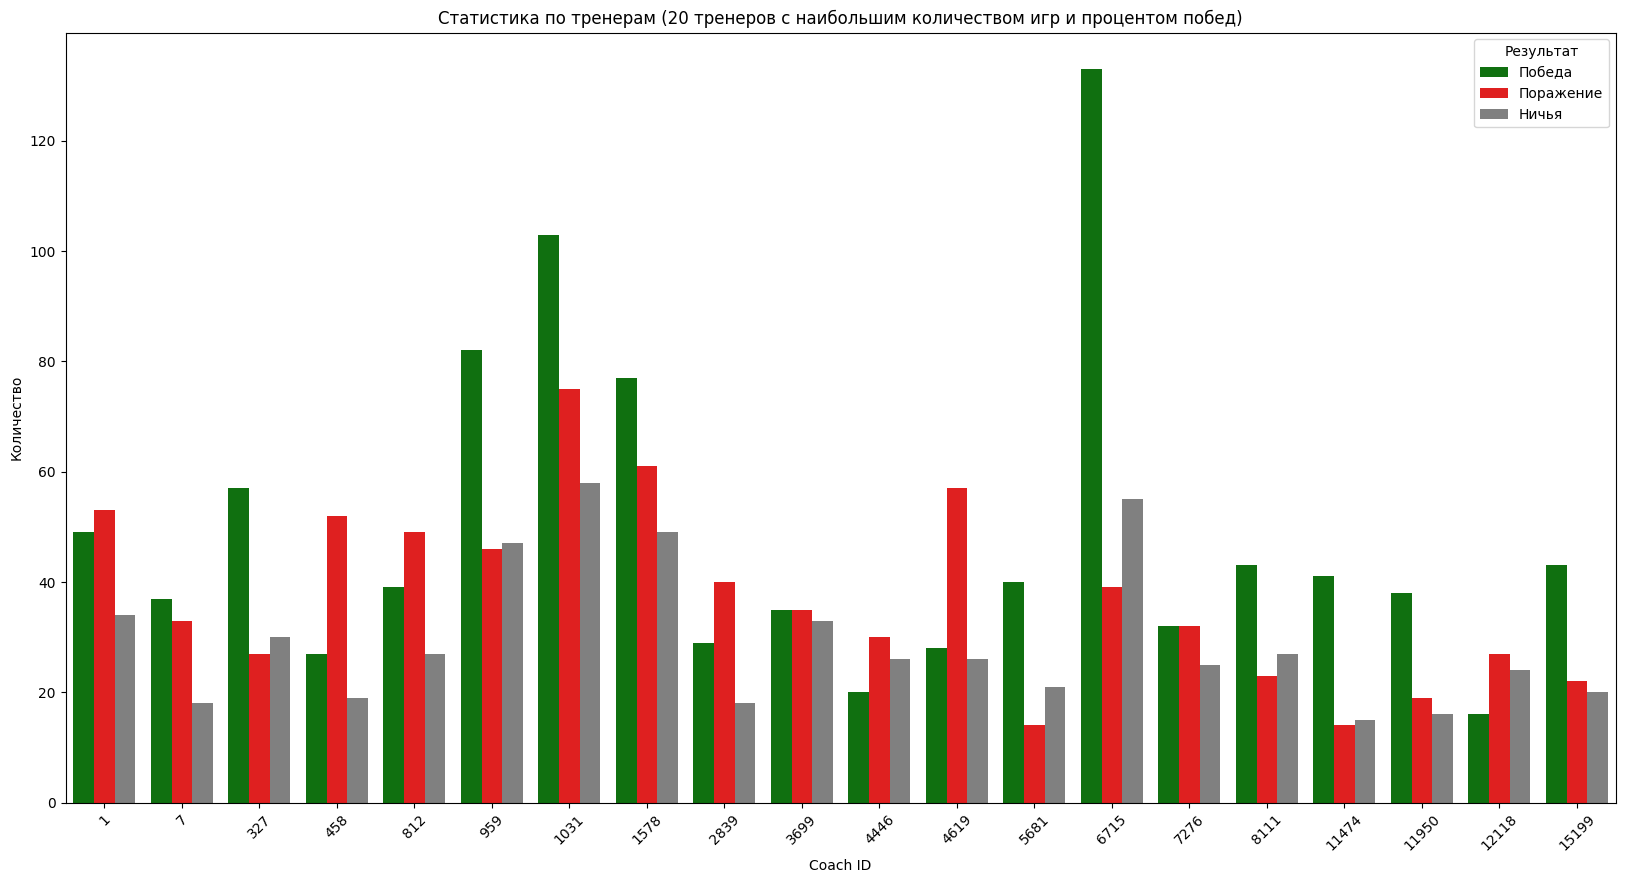

In [45]:
import seaborn as sns

# Сортируем тренеров по проценту побед и количеству игр
top_coaches = coach_stats_df.sort_values(['game_count', 'win_p'], ascending=False).head(20)
top_coaches['coach_id'] = top_coaches['coach_id'].astype(int)

# Подготовка данных
coach_stats_df_melted = pd.melt(
    top_coaches,
    id_vars='coach_id',
    value_vars=['Победа', 'Поражение', 'Ничья'],
    var_name='result',
    value_name='count'
)

# Построение сгруппированного графика
plt.figure(figsize=(20, 10))
sns.barplot(
    data=coach_stats_df_melted,
    x='coach_id',
    y='count',
    hue='result',
    palette={'Победа': 'green', 'Поражение': 'red', 'Ничья': 'gray'}
)
plt.title('Статистика по тренерам (20 тренеров с наибольшим количеством игр и процентом побед)')
plt.xlabel('Coach ID')
plt.ylabel('Количество')
plt.legend(title='Результат')
plt.xticks(rotation=45)
plt.show()

#### График - Распределение схем по количеству игр

In [35]:
# количество игр с различными схемами игроков на поле
left_count_lineup_df = sorted_df.drop_duplicates(subset=['game_id', 'left_num_v', 'left_num_z', 'left_num_p', 'left_num_n'])
right_count_lineup_df = sorted_df.drop_duplicates(subset=['game_id', 'right_num_v', 'right_num_z', 'right_num_p', 'right_num_n'])

count_lineup_dict: dict[str, int] = {}

for _, row in left_count_lineup_df.iterrows():
    left_lineup_str = f'{int(row['left_num_v'])}-{int(row['left_num_z'])}-{int(row['left_num_p'])}-{int(row['left_num_n'])}'
    
    count_lineup_dict[left_lineup_str] = count_lineup_dict.setdefault(left_lineup_str, 0) + 1
    
for _, row in right_count_lineup_df.iterrows():
    right_lineup_str = f'{int(row['right_num_v'])}-{int(row['right_num_z'])}-{int(row['right_num_p'])}-{int(row['right_num_n'])}'
    
    count_lineup_dict[right_lineup_str] = count_lineup_dict.setdefault(right_lineup_str, 0) + 1
    
lineup_stats_df = pd.DataFrame(count_lineup_dict.items(), columns=['lineup', 'count'])

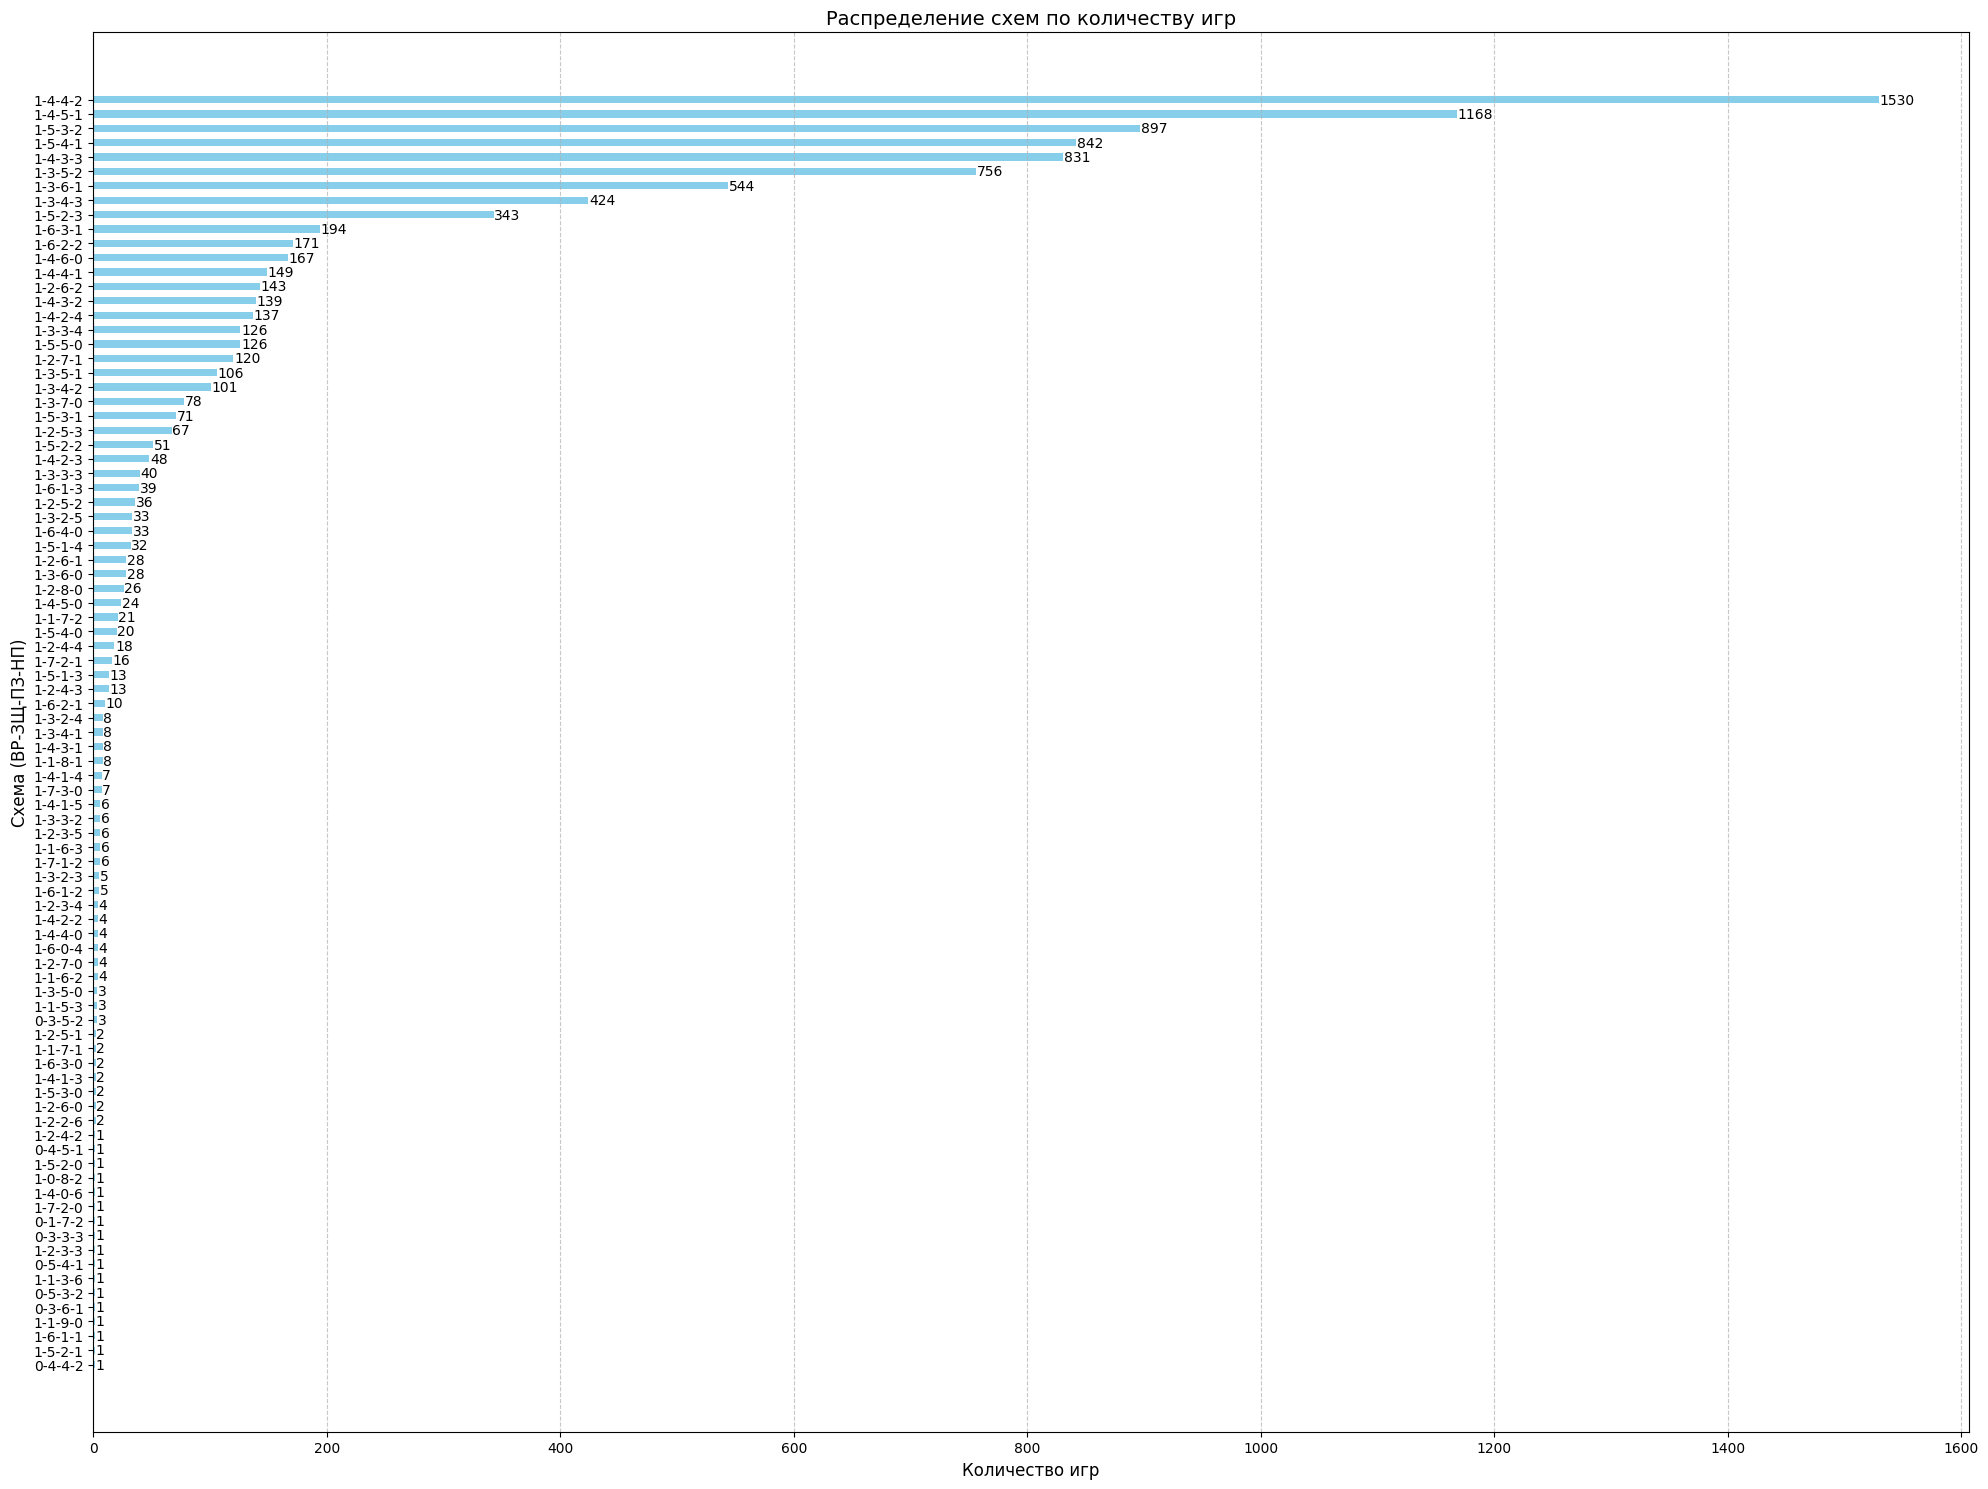

In [47]:
# Сортировка данных по количеству
lineup_stats_sorted = lineup_stats_df.sort_values('count', ascending=True)

# Создание графика
plt.figure(figsize=(20, 15))
bars = plt.barh(
    lineup_stats_sorted['lineup'],
    lineup_stats_sorted['count'],
    color='skyblue',
    height=0.5
)

# Настройка оформления
plt.title('Распределение схем по количеству игр', fontsize=14)
plt.xlabel('Количество игр', fontsize=12)
plt.ylabel('Схема (ВР-ЗЩ-ПЗ-НП)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавление значений на столбцы
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{int(width)}',
        va='center',
        ha='left',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [48]:
# красная карточка вратарю на 8 минуте матча https://www.championat.com/football/_russiapl/tournament/1768/match/567548/#stats

sorted_df.loc[((sorted_df['right_num_v']==0) & (sorted_df['right_num_z']==4) & (sorted_df['right_num_p']==4) & (sorted_df['right_num_n']==2)) |
              ((sorted_df['left_num_v']==0) & (sorted_df['left_num_z']==4) & (sorted_df['left_num_p']==4) & (sorted_df['left_num_n']==2))
              ].head()

season_id  game_id  left_team_id  right_team_id  tour_number  min  \
1140       1768     9024            21              7           13  8.0   

      plus_min  left_coach_id  right_coach_id  referee_id  left_num_v  \
1140       0.0         1031.0          3933.0        19.0           0   

      left_num_z  left_num_p  left_num_n  left_num_u  right_num_v  \
1140           4           4           2           0            1   

      right_num_z  right_num_p  right_num_n  right_num_u  left_num_y  \
1140            4            3            3            0           0   

      left_num_y2r  right_num_y  right_num_y2r  right_num_goal_g  \
1140             1            0              0                 0   

      right_num_goal_p  right_num_goal_a  left_num_goal_g  left_num_goal_p  \
1140                 0                 0                0                0   

      left_num_goal_a  left_total_transfer_value  right_total_transfer_value  \
1140                0                  8900000.0                  41500000.0   

      left_avg_transfer_value  right_avg_transfer_value  left_goal_score  \
1140                 890000.0              3.772727e+06                0   

      right_goal_score  left_avg_time_player_in_game  \
1140                 0                           8.0   

      right_avg_time_player_in_game  left_right_transfer_value_div  \
1140                            8.0                       0.214458   

      right_left_transfer_value_div  res_event  res  
1140                       4.662921          0    2

In [49]:
sorted_df.describe().applymap(beautify_float)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_9748\3116729034.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sorted_df.describe().applymap(beautify_float)


season_id   game_id left_team_id right_team_id tour_number       min  \
count  27655.00  27655.00     27655.00      27655.00    27655.00  27655.00   
mean    3837.35  10013.88        15.20         15.12       15.40     56.80   
std     1385.78    604.92         8.03          8.03        8.58     27.49   
min     1768.00   8927.00         0.00          0.00        1.00      0.00   
25%     2599.00   9506.00         8.00          8.00        8.00     40.00   
50%     3953.00  10020.00        15.00         15.00       15.00     64.00   
75%     4987.00  10531.00        22.00         22.00       23.00     79.00   
max     5980.00  11061.00        29.00         29.00       30.00     90.00   

       plus_min left_coach_id right_coach_id referee_id left_num_v left_num_z  \
count  27655.00      27655.00       27655.00   27655.00   27655.00   27655.00   
mean       0.25       5579.49        5579.69    1448.27       1.00       3.97   
std        0.99       5742.21        5797.88    2586.33       0.01       0.90   
min        0.00          1.00           1.00       3.00       0.00       1.00   
25%        0.00        812.00         812.00     398.00       1.00       3.00   
50%        0.00       3699.00        3699.00     707.00       1.00       4.00   
75%        0.00       9133.00        9133.00    1137.00       1.00       5.00   
max       16.00      23660.00       23660.00   15584.00       1.00       7.00   

      left_num_p left_num_n left_num_u right_num_v right_num_z right_num_p  \
count   27655.00   27655.00   27655.00    27655.00    27655.00    27655.00   
mean        4.13       1.85       0.00        1.00        4.00        4.16   
std         1.21       0.91       0.00        0.01        0.93        1.21   
min         0.00       0.00       0.00        0.00        0.00        0.00   
25%         3.00       1.00       0.00        1.00        3.00        3.00   
50%         4.00       2.00       0.00        1.00        4.00        4.00   
75%         5.00       2.00       0.00        1.00        5.00        5.00   
max         9.00       6.00       0.00        1.00        7.00        8.00   

      right_num_n right_num_u left_num_y left_num_y2r right_num_y  \
count    27655.00    27655.00   27655.00     27655.00    27655.00   
mean         1.77        0.00       1.18         0.05        1.35   
std          0.90        0.00       1.19         0.23        1.28   
min          0.00        0.00       0.00         0.00        0.00   
25%          1.00        0.00       0.00         0.00        0.00   
50%          2.00        0.00       1.00         0.00        1.00   
75%          2.00        0.00       2.00         0.00        2.00   
max          6.00        0.00       9.00         2.00        8.00   

      right_num_y2r right_num_goal_g right_num_goal_p right_num_goal_a  \
count      27655.00         27655.00         27655.00         27655.00   
mean           0.07             0.60             0.07             0.02   
std            0.28             0.84             0.26             0.13   
min            0.00             0.00             0.00             0.00   
25%            0.00             0.00             0.00             0.00   
50%            0.00             0.00             0.00             0.00   
75%            0.00             1.00             0.00             0.00   
max            3.00             7.00             3.00             1.00   

      left_num_goal_g left_num_goal_p left_num_goal_a  \
count        27655.00        27655.00        27655.00   
mean             0.75            0.10            0.03   
std              0.95            0.32            0.16   
min              0.00            0.00            0.00   
25%              0.00            0.00            0.00   
50%              0.00            0.00            0.00   
75%              1.00            0.00            0.00   
max              8.00            3.00            1.00   

      left_total_transfer_value right_total_transfer_value  \
count

Заменим значения inf в столбцах left_right_transfer_value_div и right_left_transfer_value_div на максимальное значение int

In [50]:
import numpy as np

sorted_df = sorted_df.replace([-np.inf, np.inf], [-9999, 9999])

In [51]:
sorted_df.describe().applymap(beautify_float)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_9748\3116729034.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sorted_df.describe().applymap(beautify_float)


season_id   game_id left_team_id right_team_id tour_number       min  \
count  27655.00  27655.00     27655.00      27655.00    27655.00  27655.00   
mean    3837.35  10013.88        15.20         15.12       15.40     56.80   
std     1385.78    604.92         8.03          8.03        8.58     27.49   
min     1768.00   8927.00         0.00          0.00        1.00      0.00   
25%     2599.00   9506.00         8.00          8.00        8.00     40.00   
50%     3953.00  10020.00        15.00         15.00       15.00     64.00   
75%     4987.00  10531.00        22.00         22.00       23.00     79.00   
max     5980.00  11061.00        29.00         29.00       30.00     90.00   

       plus_min left_coach_id right_coach_id referee_id left_num_v left_num_z  \
count  27655.00      27655.00       27655.00   27655.00   27655.00   27655.00   
mean       0.25       5579.49        5579.69    1448.27       1.00       3.97   
std        0.99       5742.21        5797.88    2586.33       0.01       0.90   
min        0.00          1.00           1.00       3.00       0.00       1.00   
25%        0.00        812.00         812.00     398.00       1.00       3.00   
50%        0.00       3699.00        3699.00     707.00       1.00       4.00   
75%        0.00       9133.00        9133.00    1137.00       1.00       5.00   
max       16.00      23660.00       23660.00   15584.00       1.00       7.00   

      left_num_p left_num_n left_num_u right_num_v right_num_z right_num_p  \
count   27655.00   27655.00   27655.00    27655.00    27655.00    27655.00   
mean        4.13       1.85       0.00        1.00        4.00        4.16   
std         1.21       0.91       0.00        0.01        0.93        1.21   
min         0.00       0.00       0.00        0.00        0.00        0.00   
25%         3.00       1.00       0.00        1.00        3.00        3.00   
50%         4.00       2.00       0.00        1.00        4.00        4.00   
75%         5.00       2.00       0.00        1.00        5.00        5.00   
max         9.00       6.00       0.00        1.00        7.00        8.00   

      right_num_n right_num_u left_num_y left_num_y2r right_num_y  \
count    27655.00    27655.00   27655.00     27655.00    27655.00   
mean         1.77        0.00       1.18         0.05        1.35   
std          0.90        0.00       1.19         0.23        1.28   
min          0.00        0.00       0.00         0.00        0.00   
25%          1.00        0.00       0.00         0.00        0.00   
50%          2.00        0.00       1.00         0.00        1.00   
75%          2.00        0.00       2.00         0.00        2.00   
max          6.00        0.00       9.00         2.00        8.00   

      right_num_y2r right_num_goal_g right_num_goal_p right_num_goal_a  \
count      27655.00         27655.00         27655.00         27655.00   
mean           0.07             0.60             0.07             0.02   
std            0.28             0.84             0.26             0.13   
min            0.00             0.00             0.00             0.00   
25%            0.00             0.00             0.00             0.00   
50%            0.00             0.00             0.00             0.00   
75%            0.00             1.00             0.00             0.00   
max            3.00             7.00             3.00             1.00   

      left_num_goal_g left_num_goal_p left_num_goal_a  \
count        27655.00        27655.00        27655.00   
mean             0.75            0.10            0.03   
std              0.95            0.32            0.16   
min              0.00            0.00            0.00   
25%              0.00            0.00            0.00   
50%              0.00            0.00            0.00   
75%              1.00            0.00            0.00   
max              8.00            3.00            1.00   

      left_total_transfer_value right_total_transfer_value  \
count

#### График - Анализ выбросов значений в числоавых атрибутах

In [52]:
num_columns = [ 
    'left_num_v', 
    'left_num_z', 
    'left_num_p', 
    'left_num_n', 
    'left_num_u', 
    'right_num_v', 
    'right_num_z', 
    'right_num_p', 
    'right_num_n', 
    'right_num_u',
    'left_num_y',
    'left_num_y2r',
    'right_num_y',
    'right_num_y2r',
    'right_num_goal_g',
    'right_num_goal_p',
    'right_num_goal_a',
    'left_num_goal_g',
    'left_num_goal_p',
    'left_num_goal_a',
    'left_total_transfer_value',
    'right_total_transfer_value',
    'left_avg_time_player_in_game',
    'right_avg_time_player_in_game'
    ]

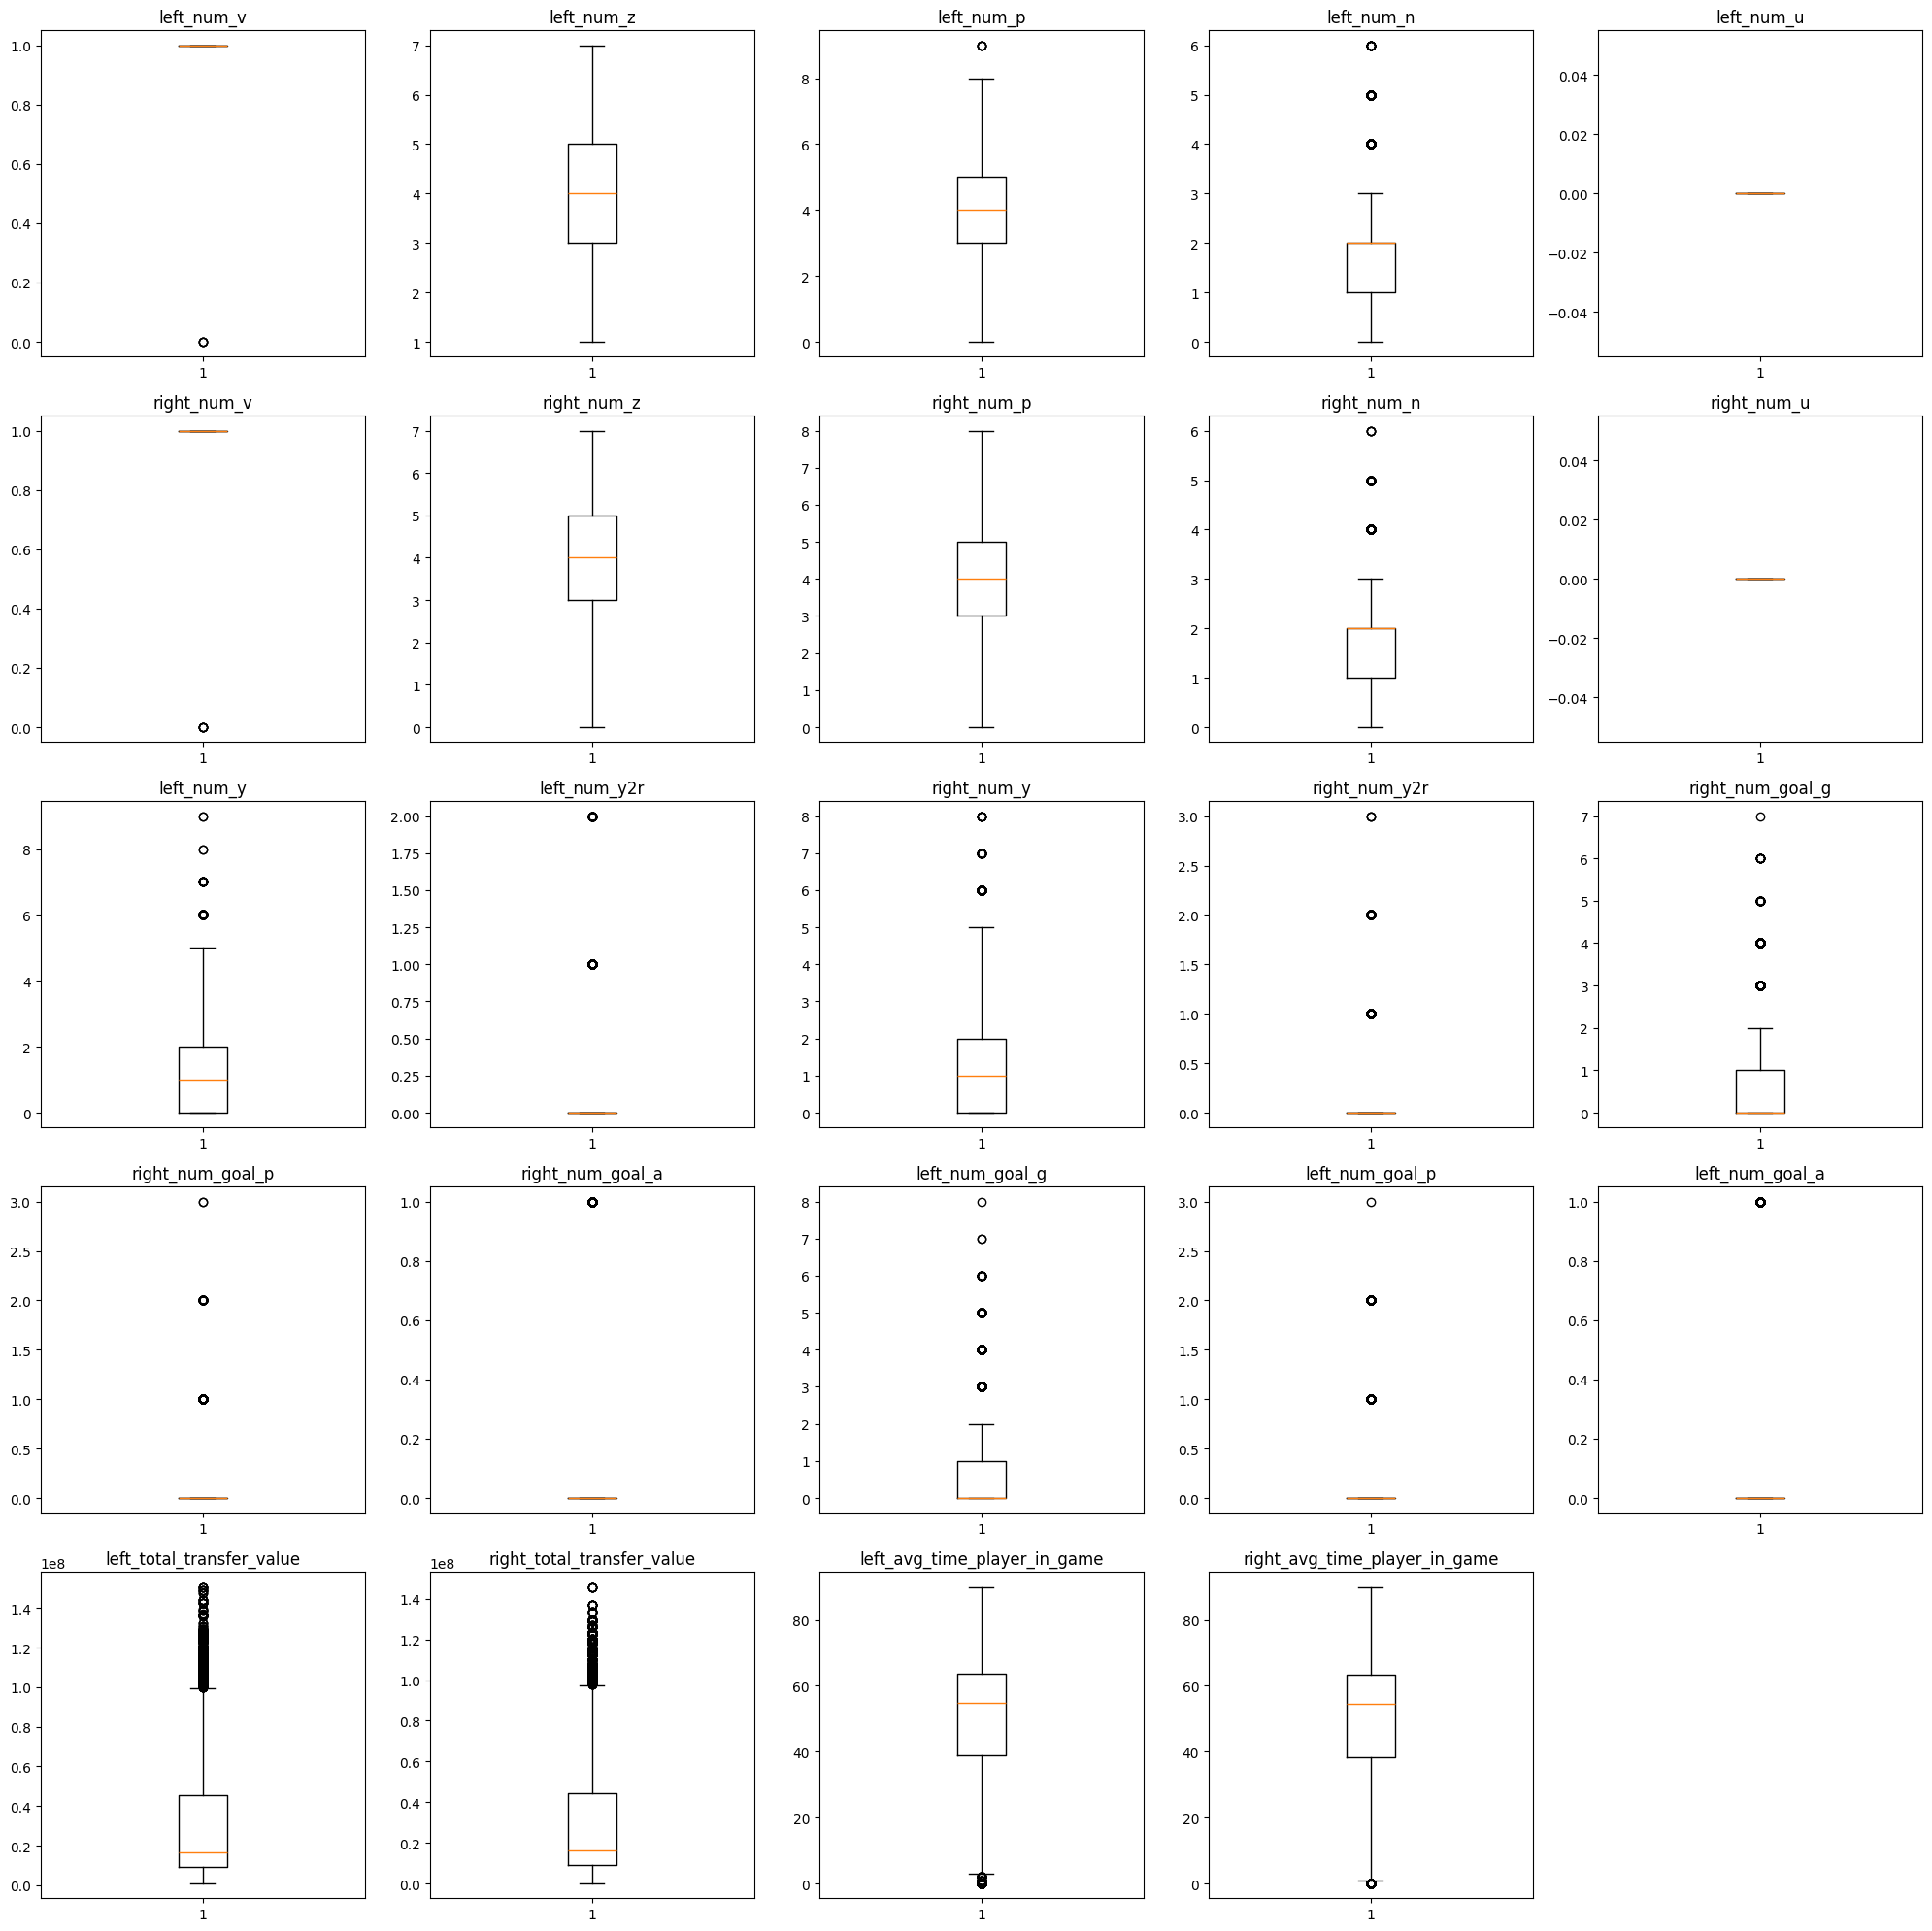

In [53]:
plt.rcParams["figure.figsize"] = 20, 20  # ширина, высота

i = 1
for col in sorted_df[num_columns]:
  plt.subplot(5, 5, i)
  plt.boxplot(sorted_df[col])
  plt.title(col)
  i += 1

plt.tight_layout()

#### График - Анализ распределения значений всех атрибутов

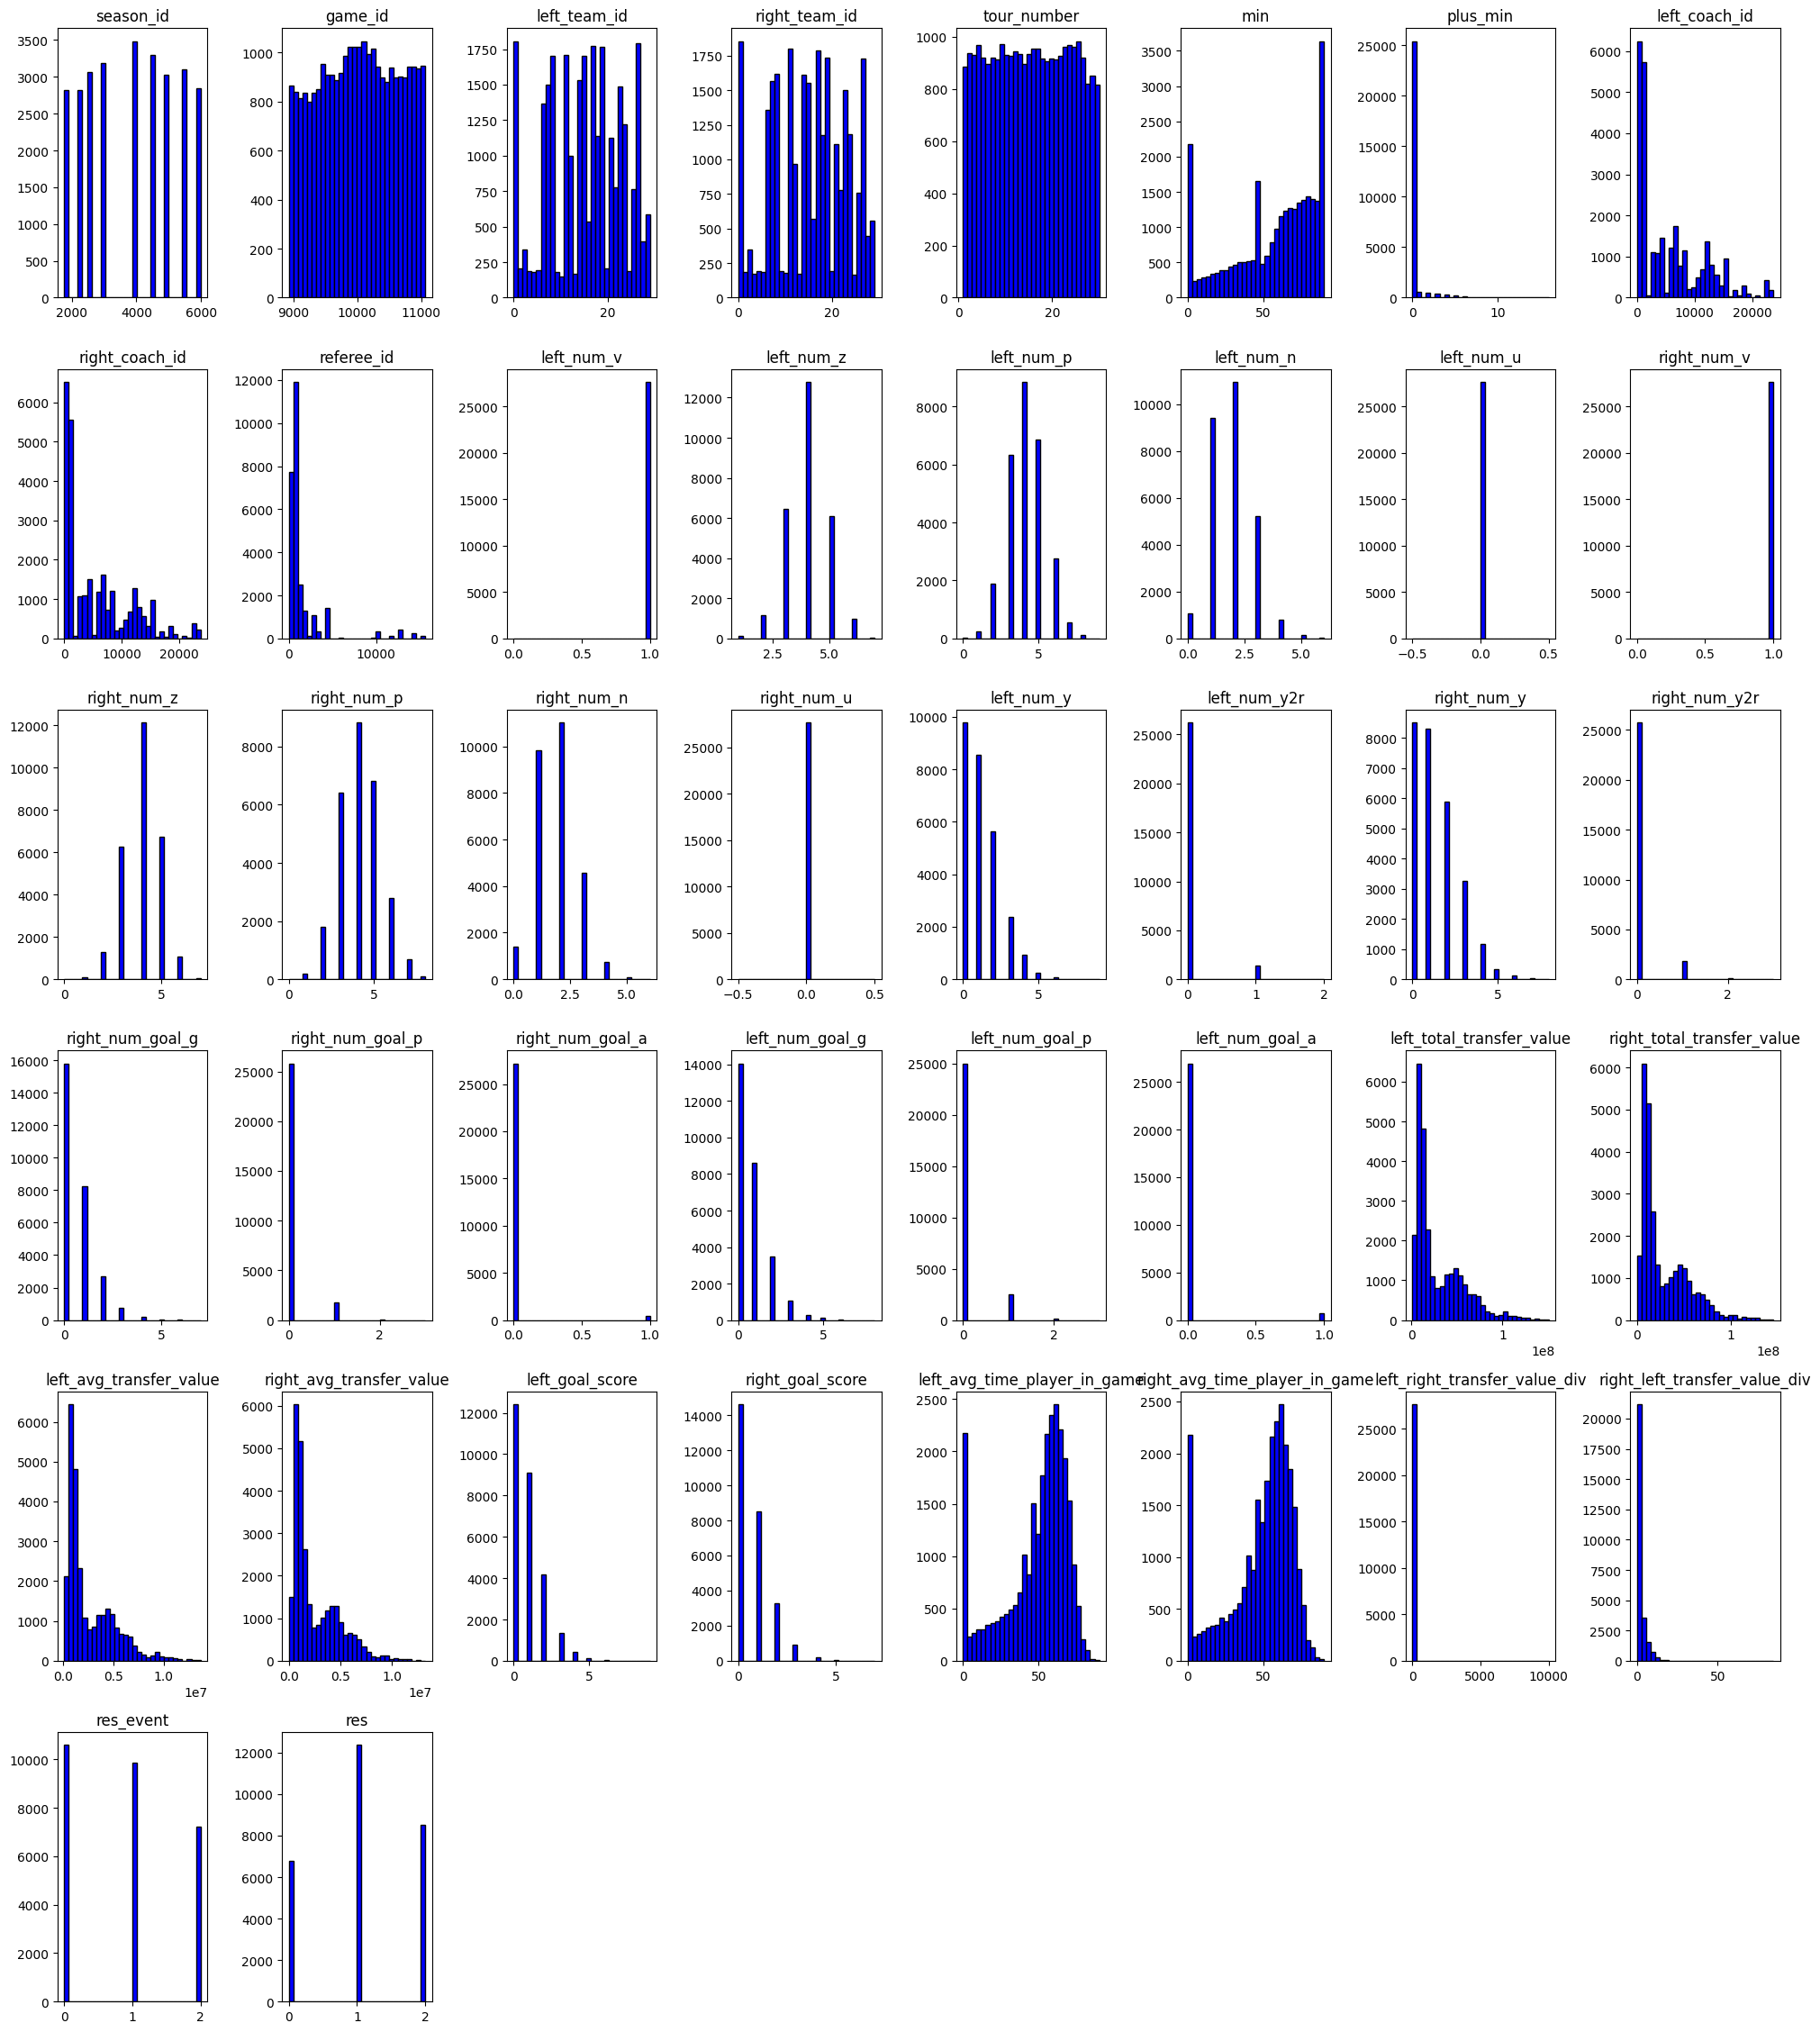

In [54]:
plt.rcParams["figure.figsize"] = 20, 30  # ширина, высота

i = 1
for col in sorted_df.columns[:]:
  plt.subplot(8, 8, i)
  plt.hist(sorted_df[col], bins=30, color="blue", linewidth=1, edgecolor="black")
  plt.title(col)
  i += 1

plt.tight_layout()

#### Тест по критерию Шапиро-Уилка

In [110]:
import scipy.stats as stats

for col in sorted_df[num_columns]:
  # выполним тест Шапиро-Уилка для всех нечисловых колонок
  stat, pval = stats.shapiro(sorted_df[col])
  print(f"{col}: Shapiro-Wilk statistic = {stat:.4f}, p-value = {pval:.4f}")

left_num_v: Shapiro-Wilk statistic = 0.0022, p-value = 0.0000
left_num_z: Shapiro-Wilk statistic = 0.8962, p-value = 0.0000
left_num_p: Shapiro-Wilk statistic = 0.9421, p-value = 0.0000
left_num_n: Shapiro-Wilk statistic = 0.8854, p-value = 0.0000
left_num_u: Shapiro-Wilk statistic = 1.0000, p-value = 1.0000
right_num_v: Shapiro-Wilk statistic = 0.0031, p-value = 0.0000
right_num_z: Shapiro-Wilk statistic = 0.9034, p-value = 0.0000
right_num_p: Shapiro-Wilk statistic = 0.9410, p-value = 0.0000
right_num_n: Shapiro-Wilk statistic = 0.8862, p-value = 0.0000
right_num_u: Shapiro-Wilk statistic = 1.0000, p-value = 1.0000
left_num_y: Shapiro-Wilk statistic = 0.8443, p-value = 0.0000
left_num_y2r: Shapiro-Wilk statistic = 0.2315, p-value = 0.0000
right_num_y: Shapiro-Wilk statistic = 0.8671, p-value = 0.0000
right_num_y2r: Shapiro-Wilk statistic = 0.2770, p-value = 0.0000
right_num_goal_g: Shapiro-Wilk statistic = 0.7157, p-value = 0.0000
right_num_goal_p: Shapiro-Wilk statistic = 0.2708, p-

c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27655.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


#### Корреляция (ранговые коэффициенты) - heatmap (тепловая карта)

<Axes: >

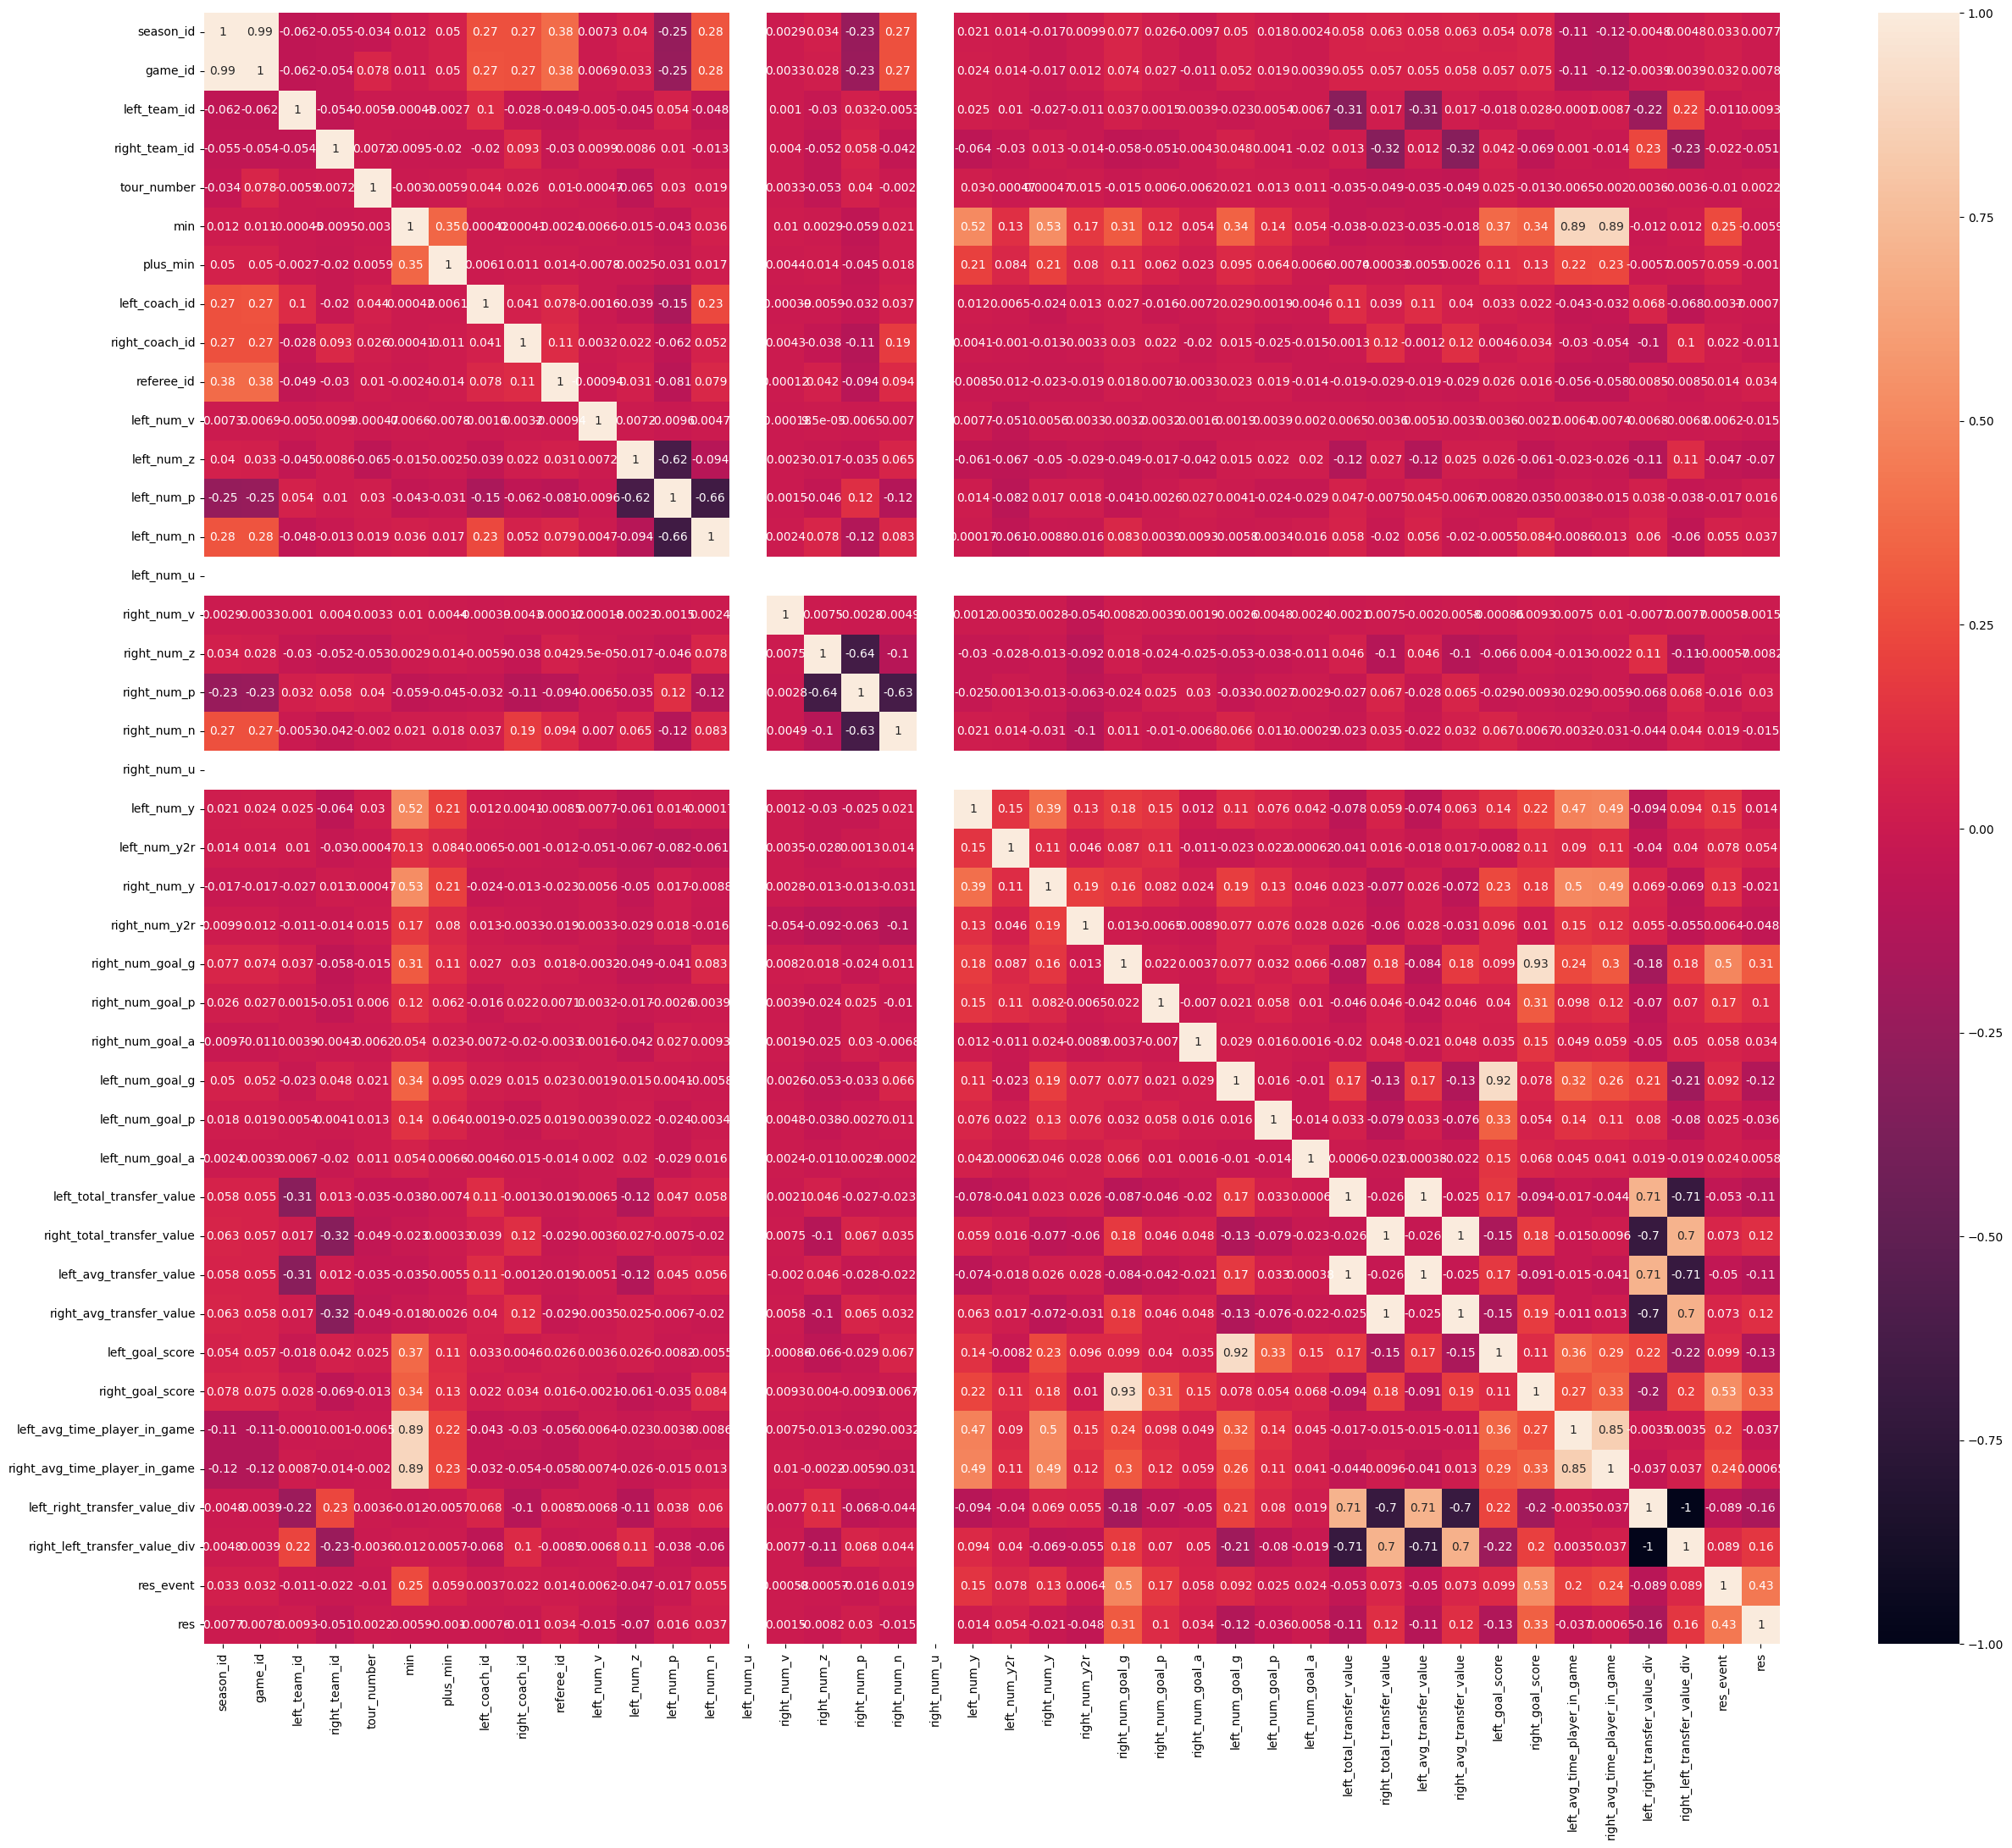

In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = 30, 25  # ширина, высота

# все колонки ненормальны, поэтому используем ранговый коэффициент Спирмена
# аргумент annot функции heatmap() включает отображение значений в ячейках
sns.heatmap(sorted_df.corr(method="spearman", numeric_only=True), annot=True)

In [55]:
y_col = 'res' # целевая переменная (исход всей игры)

#### Корреляция факторных признаков к целевой переменной

In [25]:
sorted_df[:].corr(method='spearman',
                  numeric_only=True)[y_col].sort_values(ascending=False)

res                              1.000000
res_event                        0.432177
right_goal_score                 0.329140
right_num_goal_g                 0.311829
right_left_transfer_value_div    0.160998
right_total_transfer_value       0.120810
right_avg_transfer_value         0.119700
right_num_goal_p                 0.104647
left_num_y2r                     0.054470
left_num_n                       0.036961
referee_id                       0.034233
right_num_goal_a                 0.033549
right_num_p                      0.030156
left_num_p                       0.016085
left_num_y                       0.013980
left_team_id                     0.009325
game_id                          0.007752
season_id                        0.007714
left_num_goal_a                  0.005796
tour_number                      0.002223
right_num_v                      0.001451
right_avg_time_player_in_game    0.000654
left_coach_id                   -0.000759
plus_min                        -0

#### Корреляция между фактормными признаками

In [29]:
temp_df = sorted_df
temp_df = temp_df.drop(columns=[y_col])

temp_df[:].corr(method='spearman')

season_id   game_id  left_team_id  \
season_id                       1.000000  0.993716     -0.062031   
game_id                         0.993716  1.000000     -0.062358   
left_team_id                   -0.062031 -0.062358      1.000000   
right_team_id                  -0.054519 -0.054146     -0.053575   
tour_number                    -0.033901  0.077574     -0.005899   
min                             0.011748  0.011478     -0.000452   
plus_min                        0.049566  0.050142     -0.002740   
left_coach_id                   0.270361  0.274479      0.104950   
right_coach_id                  0.270556  0.272835     -0.028152   
referee_id                      0.377503  0.377666     -0.049226   
left_num_v                      0.007261  0.006915     -0.004997   
left_num_z                      0.040478  0.033078     -0.044553   
left_num_p                     -0.252331 -0.248825      0.053529   
left_num_n                      0.282723  0.284457     -0.047719   
left_num_u                           NaN       NaN           NaN   
right_num_v                     0.002911  0.003317      0.001006   
right_num_z                     0.034450  0.028342     -0.030483   
right_num_p                    -0.234673 -0.229956      0.031563   
right_num_n                     0.272660  0.272172     -0.005291   
right_num_u                          NaN       NaN           NaN   
left_num_y                      0.021216  0.024166      0.025394   
left_num_y2r                    0.014248  0.014193      0.009968   
right_num_y                    -0.016769 -0.017096     -0.026926   
right_num_y2r                   0.009885  0.011623     -0.011465   
right_num_goal_g                0.076559  0.074173      0.036708   
right_num_goal_p                0.026345  0.026511      0.001524   
right_num_goal_a               -0.009748 -0.010562      0.003862   
left_num_goal_g                 0.049642  0.051804     -0.022951   
left_num_goal_p                 0.017591  0.019250      0.005383   
left_num_goal_a                 0.002390  0.003852      0.006664   
left_total_transfer_value       0.057975  0.054792     -0.309485   
right_total_transfer_value      0.062754  0.057388      0.017392   
left_avg_transfer_value         0.058323  0.055135     -0.309306   
right_avg_transfer_value        0.063427  0.058091      0.017418   
left_goal_score                 0.053953  0.056729     -0.017517   
right_goal_score                0.077632  0.075427      0.028128   
left_avg_time_player_in_game   -0.111757 -0.112061     -0.000100   
right_avg_time_player_in_game  -0.119128 -0.118971      0.008702   
left_right_transfer_value_div  -0.004758 -0.003933     -0.223101   
right_left_transfer_value_div   0.004758  0.003933      0.223101   
res_event                       0.033450  0.031808     -0.011181   

                               right_team_id  tour_number       min  plus_min  \
season_id                          -0.054519    -0.033901  0.011748  0.049566   
game_id                            -0.054146     0.077574  0.011478  0.050142   
left_team_id                       -0.053575    -0.005899 -0.000452 -0.002740   
right_team_id                       1.000000     0.007169 -0.009520 -0.020177   
tour_number                         0.007169     1.000000 -0.002988  0.005884   
min                                -0.009520    -0.002988  1.000000  0.353696   
plus_min                           -0.020177     0.005884  0.353696  1.000000   
left_coach_id                      -0.019572     0.043657  0.000423  0.006062   
right_coach_id                      0.092545     0.026125  0.000405  0.011269   
referee_id                         -0.030415     0.009961 -0.002386  0.013535   
left_num_v                          0.009895    -0.000467  0.006559 -0.007810   
left_num_z                          0.008590    -0.065449 -0.014522 -0.002485   
left_num_p                          0.010266     0.030483 -0.043127 -0.030680   
left_num_n                         -0.01

Исключим признаки:
- season_id
- game_id (при делении на тренировочную и тестовую выборки)
- tour_number
- min
- plus_min
- left_team_id
- right_team_id

In [56]:
del_col = ['game_id', 'left_team_id', 'right_team_id', 'season_id', 'tour_number', 'min', 'plus_min']
sorted_df = sorted_df.drop(columns=del_col)
sorted_df.head(1)

left_coach_id  right_coach_id  referee_id  left_num_v  left_num_z  \
0          158.0          7276.0       416.0           1           4   

   left_num_p  left_num_n  left_num_u  right_num_v  right_num_z  right_num_p  \
0           4           2           0            1            3            6   

   right_num_n  right_num_u  left_num_y  left_num_y2r  right_num_y  \
0            1            0           0             0            0   

   right_num_y2r  right_num_goal_g  right_num_goal_p  right_num_goal_a  \
0              0                 0                 0                 0   

   left_num_goal_g  left_num_goal_p  left_num_goal_a  \
0                0                0                0   

   left_total_transfer_value  right_total_transfer_value  \
0                 75000000.0                  39800000.0   

   left_avg_transfer_value  right_avg_transfer_value  left_goal_score  \
0             6.818182e+06              3.618182e+06                0   

   right_goal_score  left_avg_time_player_in_game  \
0                 0                           0.0   

   right_avg_time_player_in_game  left_right_transfer_value_div  \
0                            0.0                       1.884422   

   right_left_transfer_value_div  res_event  res  
0                       0.530667          0    0

### Моделирование

In [57]:
from sklearn.model_selection import train_test_split

X_cols = []
for col in list(sorted_df.columns):
    if col == y_col: continue
    X_cols.append(col)

# Разбиение набора данных на обучающую и тестовую выборки 8 к 2
X_train, X_test, y_train, y_test = train_test_split(
    sorted_df[X_cols], sorted_df[[y_col]], test_size=0.2, random_state=340
)

In [58]:
X_train.head(1)

left_coach_id  right_coach_id  referee_id  left_num_v  left_num_z  \
22976            1.0          6715.0     10131.0           1           5   

       left_num_p  left_num_n  left_num_u  right_num_v  right_num_z  \
22976           3           2           0            1            4   

       right_num_p  right_num_n  right_num_u  left_num_y  left_num_y2r  \
22976            4            2            0           2             0   

       right_num_y  right_num_y2r  right_num_goal_g  right_num_goal_p  \
22976            1              0                 3                 0   

       right_num_goal_a  left_num_goal_g  left_num_goal_p  left_num_goal_a  \
22976                 0                0                0                0   

       left_total_transfer_value  right_total_transfer_value  \
22976                 13200000.0                  85500000.0   

       left_avg_transfer_value  right_avg_transfer_value  left_goal_score  \
22976                1200000.0              7.772727e+06                0   

       right_goal_score  left_avg_time_player_in_game  \
22976                 3                     61.454545   

       right_avg_time_player_in_game  left_right_transfer_value_div  \
22976                      50.818182                       0.154386   

       right_left_transfer_value_div  res_event  
22976                       6.477273          2

In [59]:
y_train.head(1)

res
22976    2

In [60]:
print(y_train.value_counts() / len(y_train))

res
1      0.446303
2      0.309302
0      0.244395
Name: count, dtype: float64


In [61]:
print(y_test.value_counts() / len(y_test))

res
1      0.450551
2      0.303743
0      0.245706
Name: count, dtype: float64


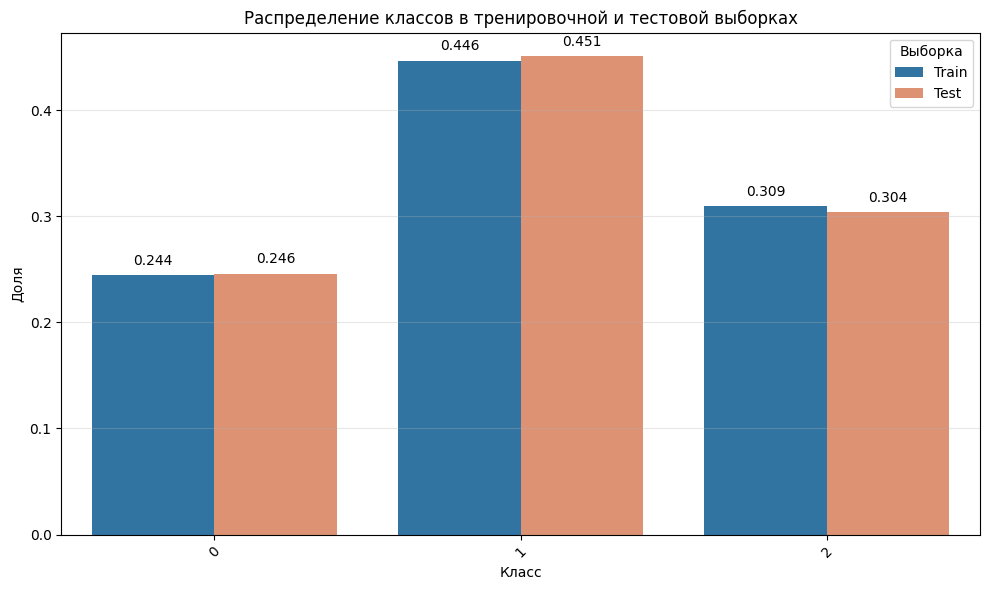

In [62]:
# Получаем распределение классов
train_dist = y_train.value_counts(normalize=True).sort_index()
test_dist = y_test.value_counts(normalize=True).sort_index()

# Создаем DataFrame для визуализации
df_dist = pd.DataFrame({
    'Train': train_dist,
    'Test': test_dist
}).reset_index()
df_dist.columns = ['Class', 'Train', 'Test']

# Преобразуем в "длинный" формат для Seaborn
df_melted = df_dist.melt(id_vars='Class', var_name='Dataset', value_name='Proportion')

# Настраиваем график
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Class',
    y='Proportion',
    hue='Dataset',
    data=df_melted,
    palette={'Train': '#1f77b4', 'Test': '#ef8a62'}
)

plt.title('Распределение классов в тренировочной и тестовой выборках')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.legend(title='Выборка')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи значений
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0: continue
    plt.gca().text(
        p.get_x() + p.get_width()/2.,
        height + 0.01,
        f'{height:.3f}',
        ha='center'
    )

plt.tight_layout()
plt.show()

In [63]:
from catboost import CatBoostClassifier
import sklearn.metrics as metrics

In [64]:
model_CBC = CatBoostClassifier(
    iterations=1000,
    early_stopping_rounds=50,
    depth=8,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    use_best_model=True
)

model_CBC.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [65]:
y_pred_CBC = model_CBC.predict(X_test)

In [66]:
print("F-мера (micro) =", metrics.f1_score(y_test, y_pred_CBC, average='micro'))
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_CBC))
print("Precision (micro) =", metrics.precision_score(y_test, y_pred_CBC, average='micro'))
print("Recall (micro) =", metrics.recall_score(y_test, y_pred_CBC, average='micro'))


eval_dict = {
   "Метрика":['F-мера (micro)', 'Accuracy', 'Precision (micro)', 'Recall (micro)'],
   "Значение":[
      metrics.f1_score(y_test, y_pred_CBC, average='micro'),
      metrics.accuracy_score(y_test, y_pred_CBC),
      metrics.precision_score(y_test, y_pred_CBC, average='micro'),
      metrics.recall_score(y_test, y_pred_CBC, average='micro')
   ]
}
eval_df = pd.DataFrame(eval_dict)
eval_df

F-мера (micro) = 0.9764961128186584
Accuracy = 0.9764961128186584
Precision (micro) = 0.9764961128186584
Recall (micro) = 0.9764961128186584


Метрика  Значение
0     F-мера (micro)  0.976496
1           Accuracy  0.976496
2  Precision (micro)  0.976496
3     Recall (micro)  0.976496

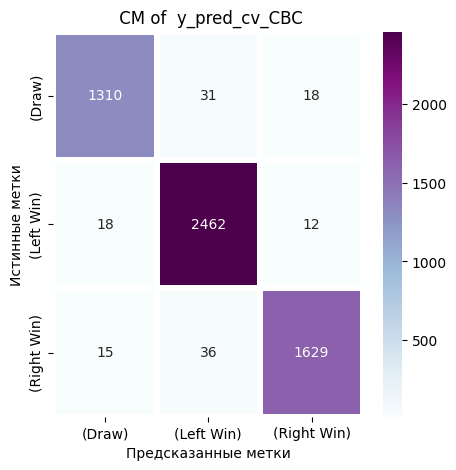

In [67]:
models_predictions=[y_pred_CBC]
model={1:'y_pred_cv_CBC',}


plt.figure(figsize=(5,5))
for i, y_pred in enumerate(models_predictions, 1) :

    cm = metrics.confusion_matrix(y_test, y_pred)

    plt.subplot(1,1,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(Draw)','(Left Win)','(Right Win)'],
                yticklabels=['(Draw)','(Left Win)','(Right Win)'])


    plt.title(' CM of  '+ model[i])
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [68]:
import matplotlib.patches as mpatches

Диаграмма рассеяния на тестовой выборке (left_total_transfer_value, right_total_transfer_value)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_9748\634487624.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  marker_colors = [colors[int(y_pred_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_CBC))]


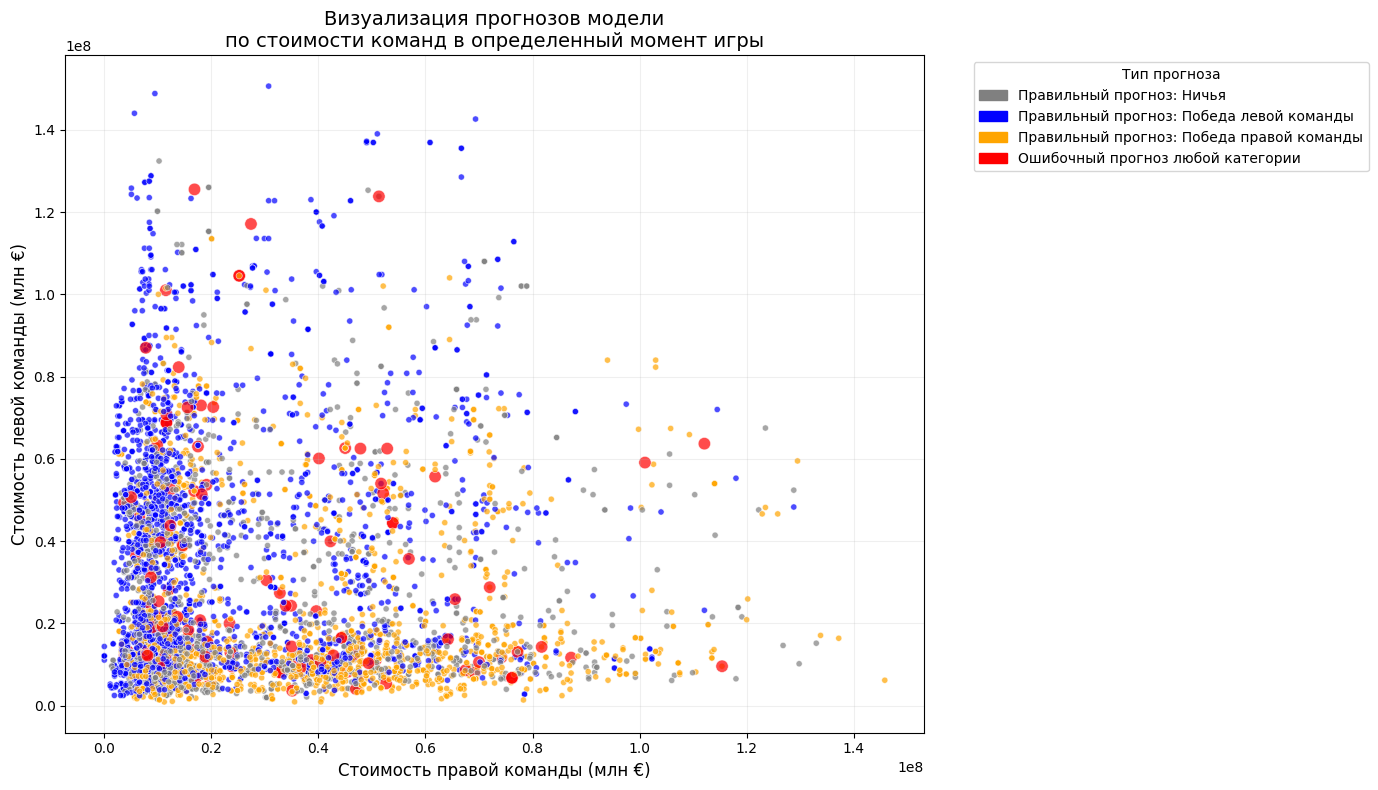

In [69]:
true_pred = np.array([y_test.iloc[i][y_col] == y_pred_CBC[i] for i in range(len(y_pred_CBC))])
false_pred = ~true_pred
colors = ['gray', 'blue', 'orange']
marker_colors = [colors[int(y_pred_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_CBC))]

x, y = 'right_total_transfer_value', 'left_total_transfer_value'

# Параметры визуализации
MARKER_SIZE_CORRECT = 20  # Размер для правильных прогнозов
MARKER_SIZE_WRONG = 80   # Размер для ошибочных прогнозов

# Создаем массив размеров маркеров
marker_sizes = [MARKER_SIZE_CORRECT if tp else MARKER_SIZE_WRONG for tp in true_pred]

plt.figure(figsize=(14, 8))

# Рисуем точки с разными цветами и размерами
scatter = plt.scatter(
    x=X_test[x],
    y=X_test[y],
    c=marker_colors,
    s=marker_sizes,
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)

# Создаем кастомные элементы для легенды
legend_elements = [
    mpatches.Patch(color='gray', label='Правильный прогноз: Ничья'),
    mpatches.Patch(color='blue', label='Правильный прогноз: Победа левой команды'),
    mpatches.Patch(color='orange', label='Правильный прогноз: Победа правой команды'),
    mpatches.Patch(color='red', label='Ошибочный прогноз любой категории')
]

plt.legend(
    handles=legend_elements,
    title="Тип прогноза",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.xlabel("Стоимость правой команды (млн €)", fontsize=12)
plt.ylabel("Стоимость левой команды (млн €)", fontsize=12)
plt.title("Визуализация прогнозов модели\nпо стоимости команд в определенный момент игры", fontsize=14)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

Диаграмма рассеяния на тестовой выборке (left_avg_time_player_in_game, right_avg_time_player_in_game)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_20128\1404883318.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  marker_colors = [colors[int(y_pred_cv_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_cv_CBC))]


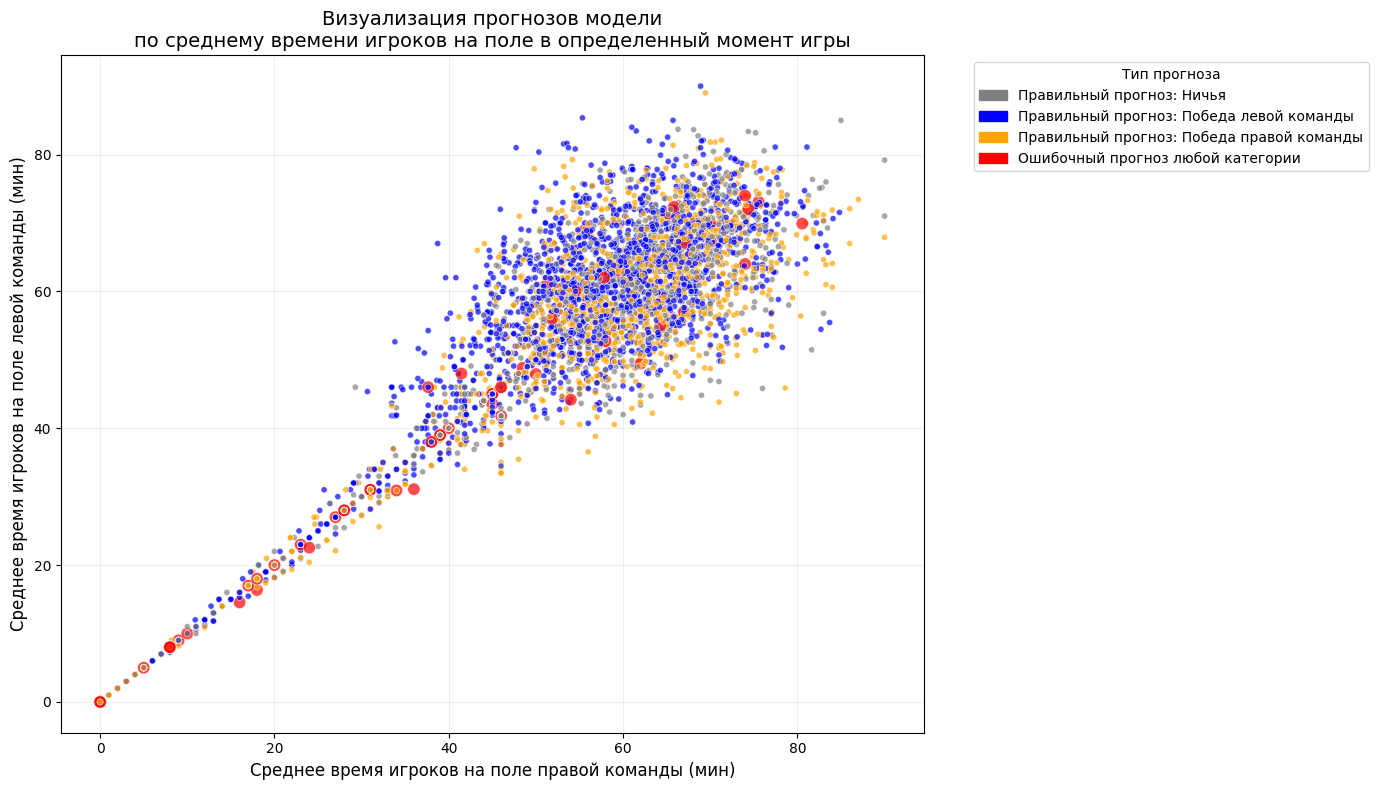

In [ ]:
true_pred = np.array([y_test.iloc[i][y_col] == y_pred_CBC[i] for i in range(len(y_pred_CBC))])
false_pred = ~true_pred
colors = ['gray', 'blue', 'orange']
marker_colors = [colors[int(y_pred_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_CBC))]

x, y = 'right_avg_time_player_in_game', 'left_avg_time_player_in_game'

# Параметры визуализации
MARKER_SIZE_CORRECT = 20  # Размер для правильных прогнозов
MARKER_SIZE_WRONG = 80   # Размер для ошибочных прогнозов

# Создаем массив размеров маркеров
marker_sizes = [MARKER_SIZE_CORRECT if tp else MARKER_SIZE_WRONG for tp in true_pred]

plt.figure(figsize=(14, 8))

# Рисуем точки с разными цветами и размерами
scatter = plt.scatter(
    x=X_test[x],
    y=X_test[y],
    c=marker_colors,
    s=marker_sizes,
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)

# Создаем кастомные элементы для легенды
legend_elements = [
    mpatches.Patch(color='gray', label='Правильный прогноз: Ничья'),
    mpatches.Patch(color='blue', label='Правильный прогноз: Победа левой команды'),
    mpatches.Patch(color='orange', label='Правильный прогноз: Победа правой команды'),
    mpatches.Patch(color='red', label='Ошибочный прогноз любой категории')
]

plt.legend(
    handles=legend_elements,
    title="Тип прогноза",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.xlabel("Среднее время игроков на поле правой команды (мин)", fontsize=12)
plt.ylabel("Среднее время игроков на поле левой команды (мин)", fontsize=12)
plt.title("Визуализация прогнозов модели\nпо среднему времени игроков на поле в определенный момент игры", fontsize=14)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

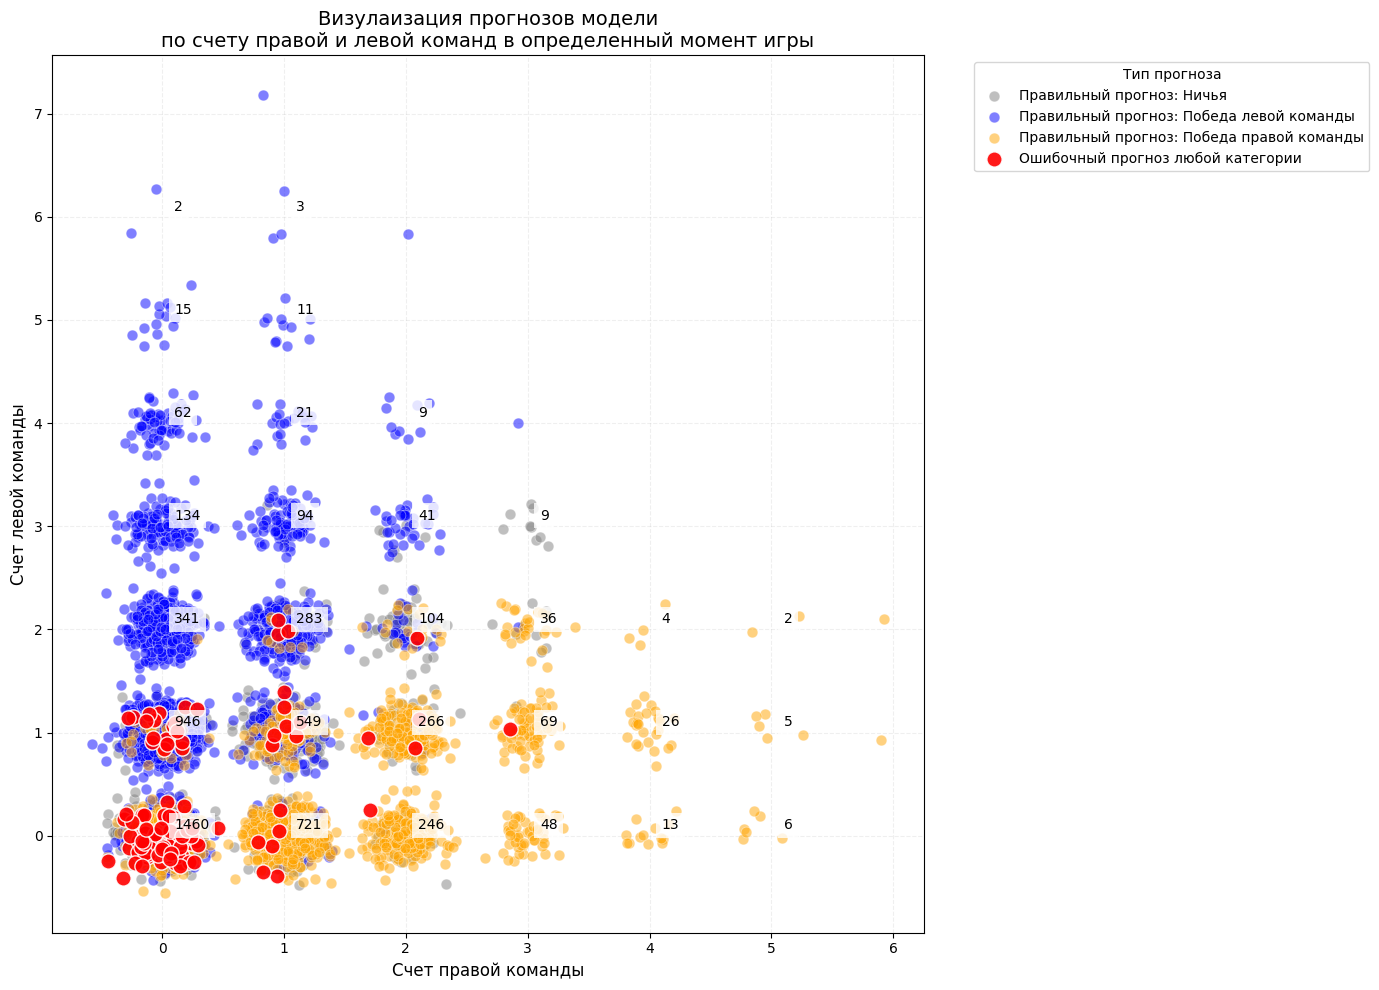

In [ ]:
# Функция для добавления случайного шума
def jitter(arr, scale=0.15):
    return arr + np.random.normal(0, scale, len(arr))

x, y = 'right_goal_score', 'left_goal_score'

# Разделение данных на классы
correct_mask = true_pred
wrong_mask = ~true_pred

plt.figure(figsize=(14, 10))

# 1. Правильные прогнозы (нижний слой)
for result, color in zip([0, 1, 2], ['gray', 'blue', 'orange']):
    mask = (y_pred_CBC == result) & correct_mask
    plt.scatter(
        x=jitter(X_test.loc[mask, x]),
        y=jitter(X_test.loc[mask, y]),
        c=color,
        s=60,
        alpha=0.5,
        edgecolors='w',
        linewidths=0.5,
        label=f'Правильный прогноз: {["Ничья", "Победа левой команды", "Победа правой команды"][result]}',
        zorder=1
    )

# 2. Ошибочные прогнозы (верхний слой)
plt.scatter(
    x=jitter(X_test.loc[wrong_mask, x]),
    y=jitter(X_test.loc[wrong_mask, y]),
    c='red',
    s=120,
    alpha=0.9,
    edgecolors='w',
    linewidths=1,
    label='Ошибочный прогноз любой категории',
    zorder=2
)

# 3. Аннотации для частых счетов
score_counts = X_test.groupby([x, y]).size().reset_index(name='count')
for _, row in score_counts[score_counts['count'] > 1].iterrows():
    plt.text(
        row[x] + 0.1,
        row[y] + 0.1,
        f"{row['count']}",
        fontsize=10,
        color='black',
        ha='left',
        va='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
        zorder=3
    )

plt.xlabel("Счет правой команды", fontsize=12)
plt.ylabel("Счет левой команды", fontsize=12)
plt.title("Визулаизация прогнозов модели\nпо счету правой и левой команд в определенный момент игры", fontsize=14)
plt.xticks(np.arange(0, X_test[x].max()+1))
plt.yticks(np.arange(0, X_test[y].max()+1))

# Улучшенная легенда
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]  # Порядок элементов в легенде
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    title="Тип прогноза",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.grid(alpha=0.2, linestyle='--')
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

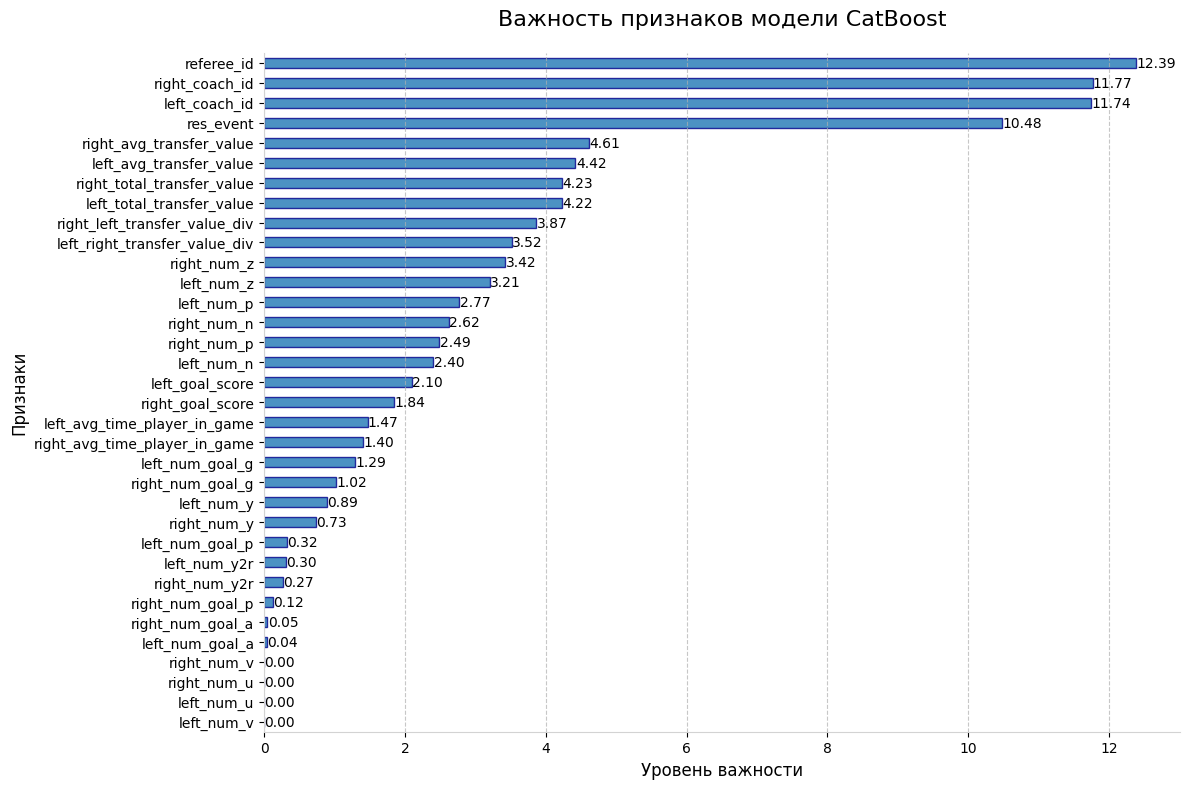

In [ ]:
import matplotlib.pyplot as plt

feature_results = pd.DataFrame({'feature':X_train.columns,
                                'importance':model_CBC.get_feature_importance()})
feature_results = feature_results.sort_values('importance',ascending=True).reset_index(drop=True)

# Создаем фигуру и оси явно
fig, ax = plt.subplots(figsize=(12, 8))  # <- Размер задается здесь (ширина, высота в дюймах)

# Строим график на созданных осях
feature_results.plot(
    x='feature', 
    y='importance',
    kind='barh',
    color='#1f77b4',
    edgecolor='darkblue',
    alpha=0.8,
    legend=False,
    ax=ax  # Явно указываем оси для отрисовки
)

# Настройки оформления
ax.set_title('Важность признаков модели CatBoost', fontsize=16, pad=20)
ax.set_xlabel('Уровень важности', fontsize=12)
ax.set_ylabel('Признаки', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения важности
for i, (importance, feature) in enumerate(zip(feature_results['importance'], feature_results['feature'])):
    ax.text(importance + 0.005, i, f'{importance:.2f}', 
            va='center', 
            fontsize=10,
            color='black')

# Убираем границы
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#d3d3d3')

# Настройки шрифтов
ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


In [ ]:
model_CBC.save_model('model_cbc_4') # сохранение модели

In [ ]:
model_CBC = CatBoostClassifier().load_model('model_cbc_4') # пример загрузки модели